<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Python Data Visualization for Everyone</h1>
        <h1>Matplotlib</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle, Wedge, Patch
from matplotlib.collections import PatchCollection, LineCollection
import matplotlib.font_manager as font_manager

import watermark

%load_ext watermark
%matplotlib inline

The **%matplotlib inline** magic function indicates to jupyter that we want our matplotlib figures to be embedded directly in the notebook. And **%load_ext watermark** loads the watermark extension that is useful to print out the versions of the libraries we'll be using.

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.12.3

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Git hash: 234b7d647acd6ea9d180b4aa60d2216547eb937a

pandas    : 2.2.3
numpy     : 1.26.4
matplotlib: 3.8.0
watermark : 2.4.3



Set the default size of all figures to 11x8 inches

In [3]:
plt.rcParams["figure.figsize"] = (11, 8)

# Basic plots

For quick and dirty plots, you can just use **plt.plot**. It won't be pretty, but it will get the job done.

In [4]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

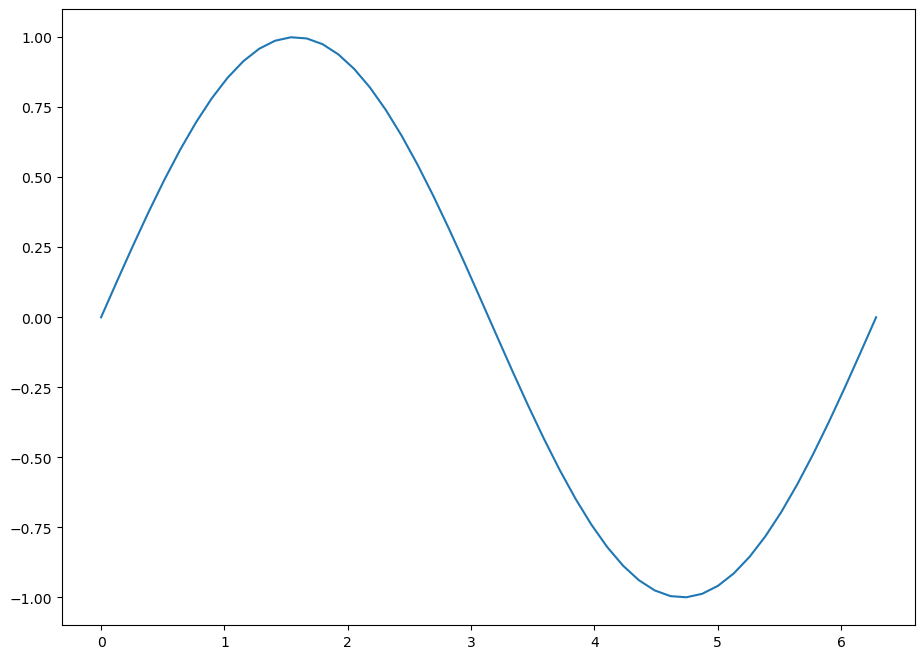

In [5]:
plt.plot(x, y)

Naturally, we can also choose the color of the line to use:

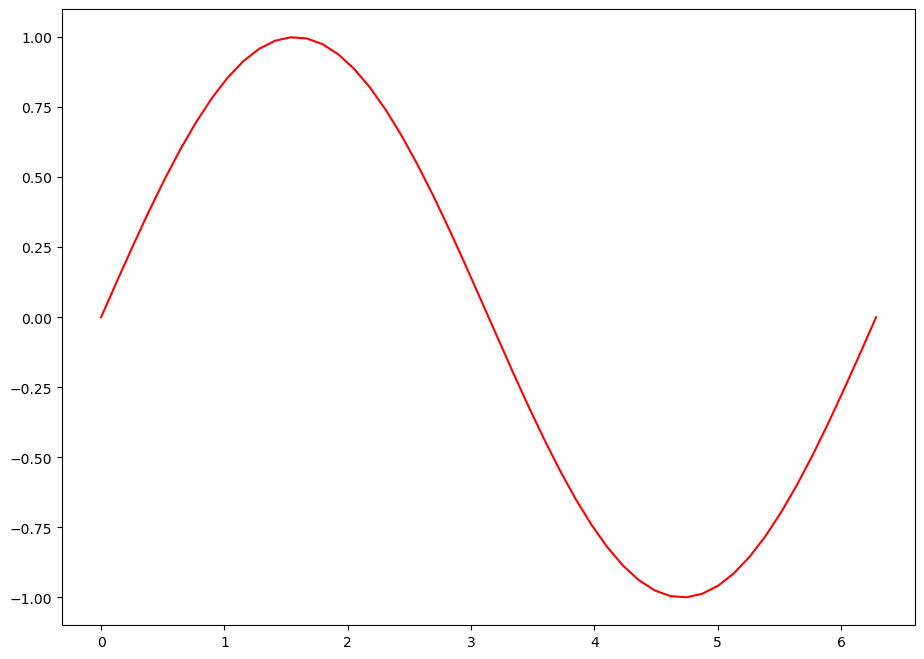

In [6]:
plt.plot(x, y, 'red')

Easily add a legend

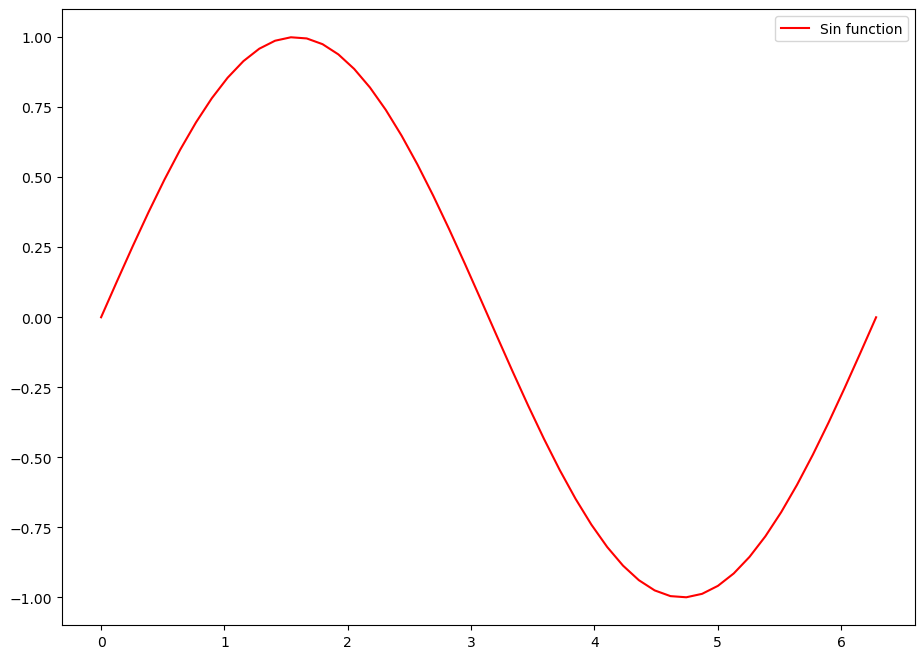

In [7]:
plt.plot(x, y, 'red')
plt.legend(['Sin function'])

Note that for the legend you just need to provide the text, matplotlib takes care of adding the corresponding lines and symbols. More complex plots can be built by calling the plot function multiple times in sequence:

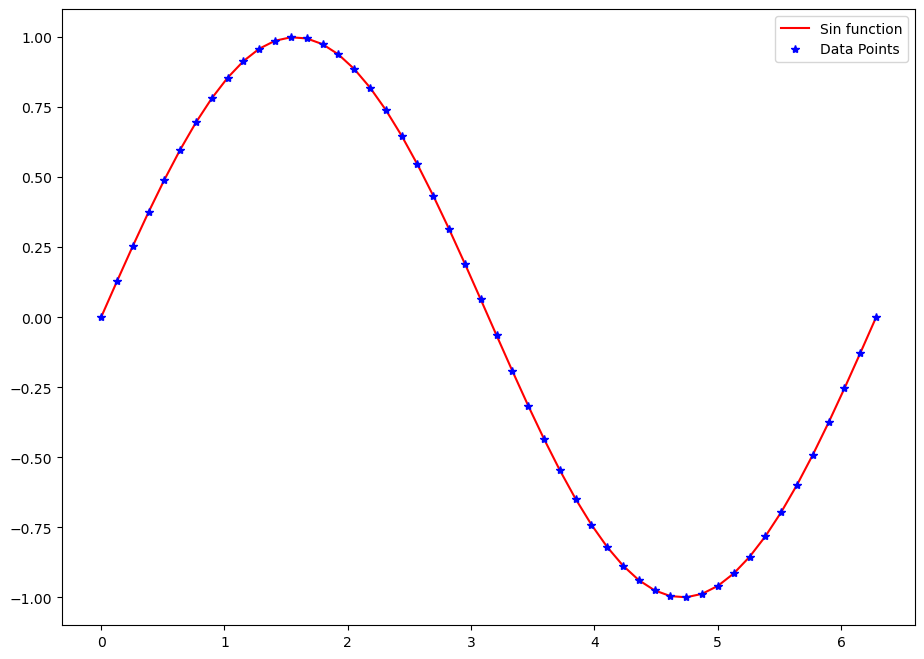

In [8]:
plt.plot(x, y, 'r-')
plt.plot(x, y, 'b*')
plt.legend(['Sin function', 'Data Points'])

# Scatter plot

Let's do something slightly more serious. We start by loading some data from a csv file using **pandas**.

Marriage age data from: https://www.statcrunch.com/5.0/viewreport.php?reportid=41662

In [9]:
ages = pd.read_csv('data/ages.csv')

Let's take a quick look at the data to make sure it is correct.

In [10]:
ages.head()

Wife  Husband
0    43       49
1    28       25
2    30       40
3    57       52
4    52       58

In [11]:
ages.shape

(170, 2)

Here we make a simple scatter plot using the (**plt.scatter***) function. Axis labels are set and the figure is saved to disk at a 300dpi resolution.

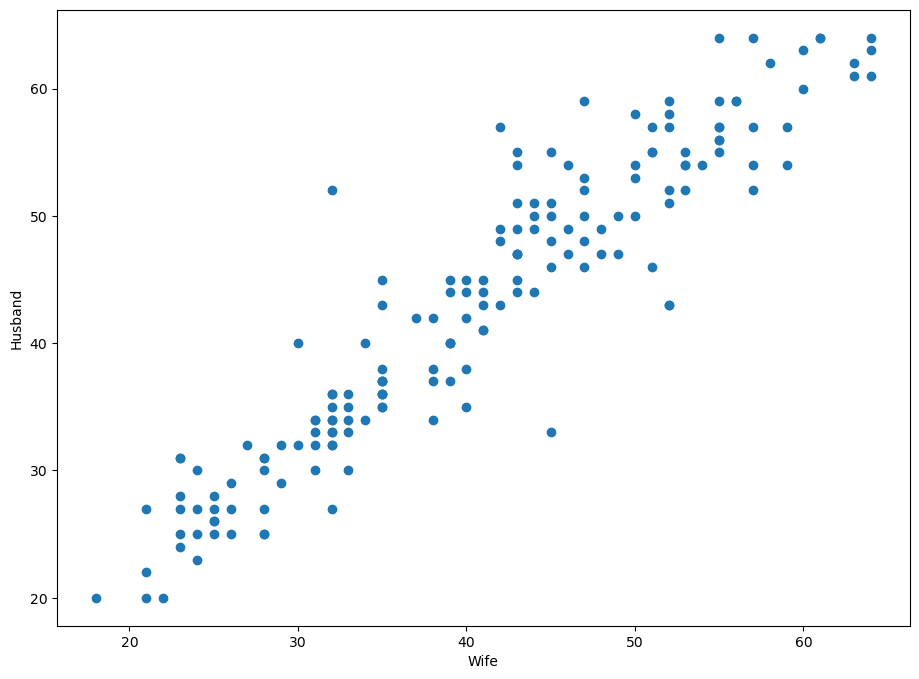

In [12]:
plt.scatter(ages['Wife'], ages['Husband'])
plt.xlabel("Wife")
plt.ylabel("Husband")
plt.savefig('data/ages.png', dpi=300)

We can also use the jupyter facilities to open the file directly from disk using the command line:

In [13]:
!ls data/ages.png # Mac Only

data/ages.png


Naturally, we could also have used the pandas internal plotting functionality. Indeed, pandas, like many other plotting libraries just use matplotlib in the background so you can do things like:

<Axes: xlabel='Wife', ylabel='Husband'>

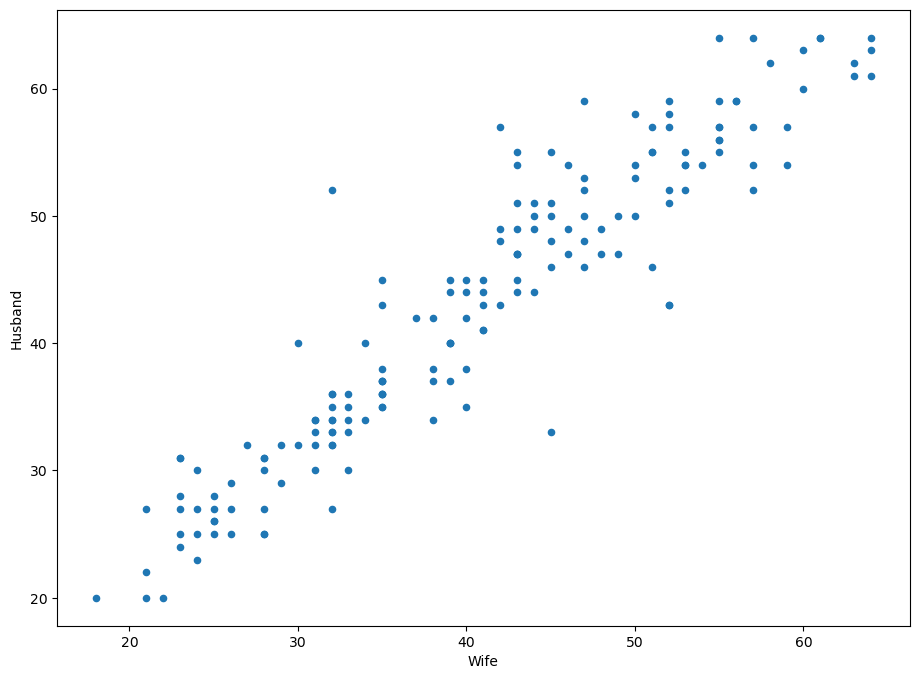

In [14]:
ages.plot.scatter(x='Wife', y='Husband')

Text(0.5, 1.0, 'Age at marriage')

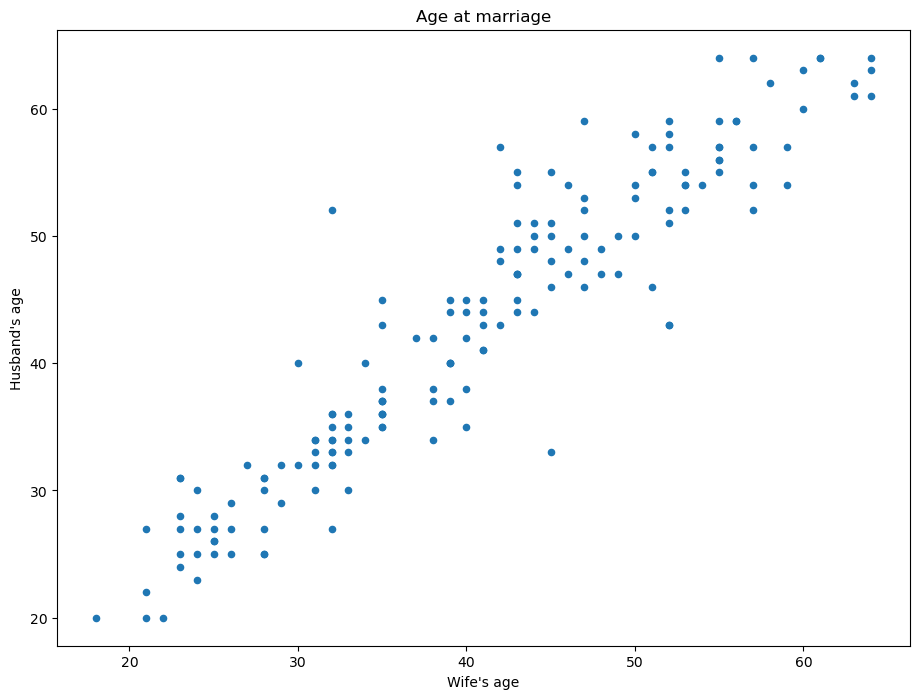

In [15]:
ages.plot.scatter(x='Wife',y='Husband')
ax = plt.gca()
ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')

where we used **plt.gca()** to get a reference to the current Axes object generated by **pandas** that we were then free to customize using standard **matplotlib** commands. 

We can even add other plots to the axis object returned by **pandas**

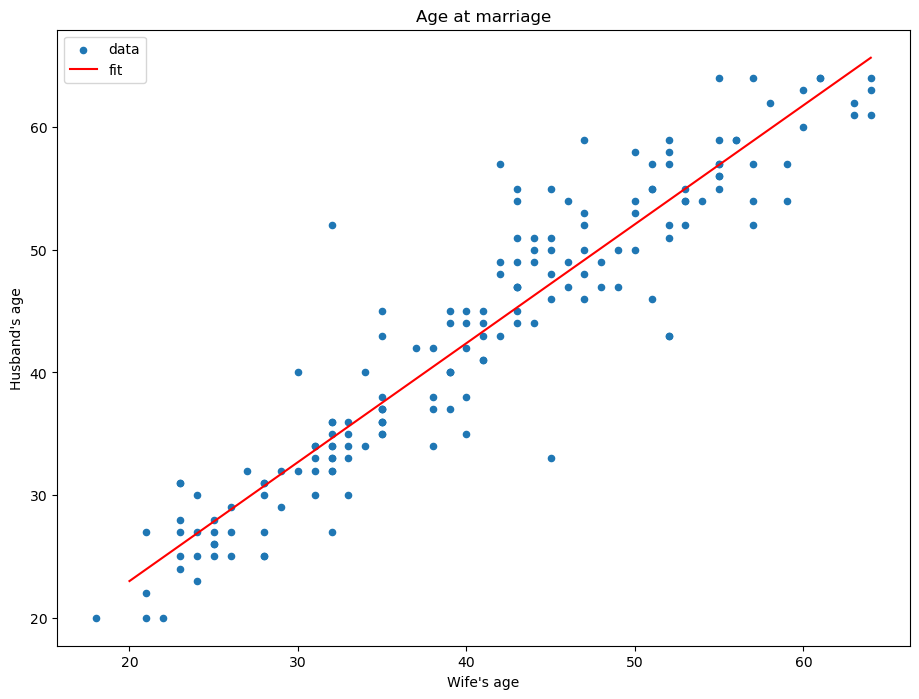

In [16]:
fit_x = np.arange(20, 65)
fit_y = 3.59+0.97*fit_x

ax = ages.plot.scatter(x='Wife',y='Husband')
#ax = plt.gca()
ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')
ax.plot(fit_x, fit_y, 'r-')
ax.legend(['data', 'fit'])

# Bar plot

**matplotlib** supports several basic types of plots out of the box. To illustrate the bar plot we will use some made up data:

In [17]:
dataLA = [20, 14, 23]
dataSF = [11, 18, 28]

pos = np.arange(0, 5, 2)
width = 0.5

Here we have two different datasets with 3 data points (classes) each. We could simply call **plt.bar** to generate the figure, similarly to what we did just above. In this case, we will take this opportunity to illustrate how to use **subplots** and the figure/axes interface in a relatively simple example. Afterward we will use this same interface to build more sophisticated examples.

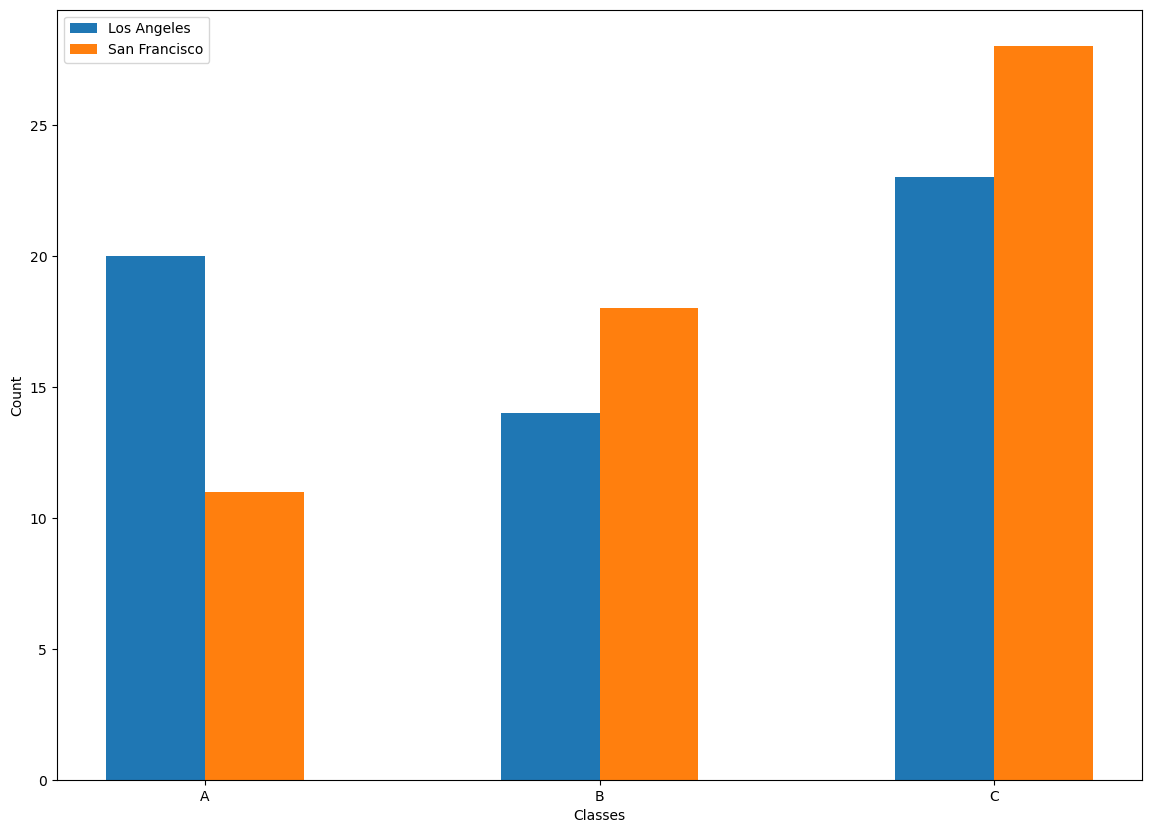

In [18]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14, 10)

ax.bar(pos,       dataLA, width=width, label="LA")
ax.bar(pos+width, dataSF, width=width, label="SF")

ax.set_ylabel('Count')
ax.set_xlabel('Classes')
ax.set_xticks(pos + width / 2)
ax.set_xticklabels(('A', 'B', 'C'))

ax.legend(['Los Angeles', 'San Francisco'])

# Pie plot

Pie plots are **EVIL**! But just in case you are too... Here we use the **figsize** parameter to **plt.figure** to set the figure size in inches. Notice that this is slightly different than what we did above.

Text(0.5, 1.0, '$\\sum_i x_i^2$')

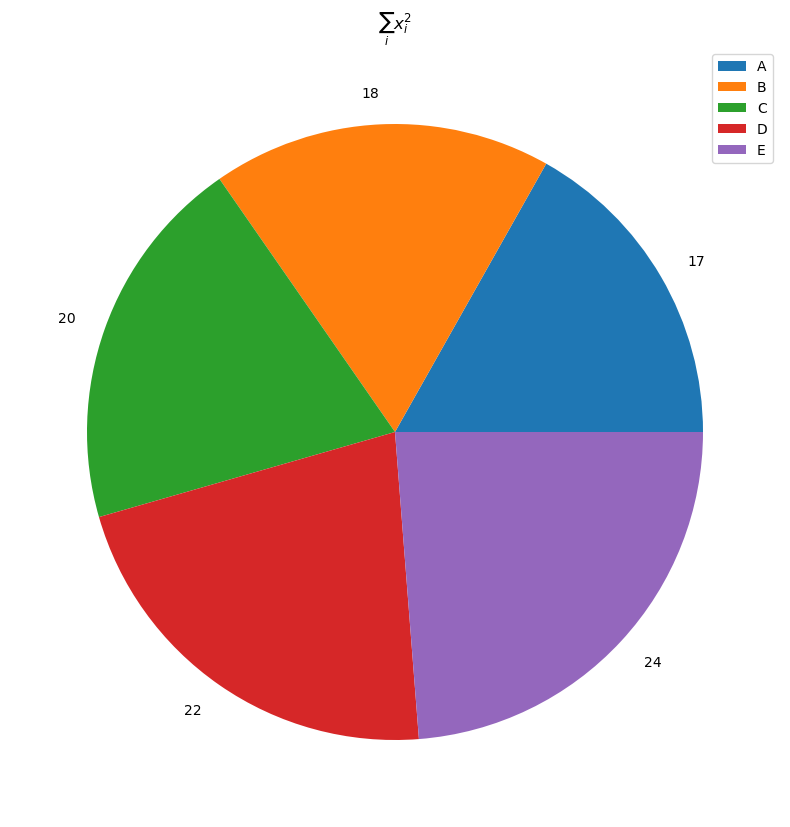

In [19]:
data = [17, 18, 20, 22, 24]

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

ax.pie(data, labels=data)
ax.legend(["A", "B", "C", "D", "E"])
ax.set_title(r'$\sum_i x_i^2$')

## Comparison of Pie and Bar plots

As we discussed, you should avoid using pie plots in most cases. This is specially true when the values of each wedge are very similar. To illustrate this point let's make up some data:

In [20]:
dataA = [17, 18, 20, 22, 24]
dataB = [20, 20, 19, 21, 20]
dataC = [24, 22, 20, 18, 17]

We'll plot these three datasets using both bar and pie plots. As we want to make sure we use the same colors for the corresponding bar/slice, we start by explicitly obtaining the color cycle

In [21]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Now we can supply the right color sequence to use for the bars

(0.0, 25.0)

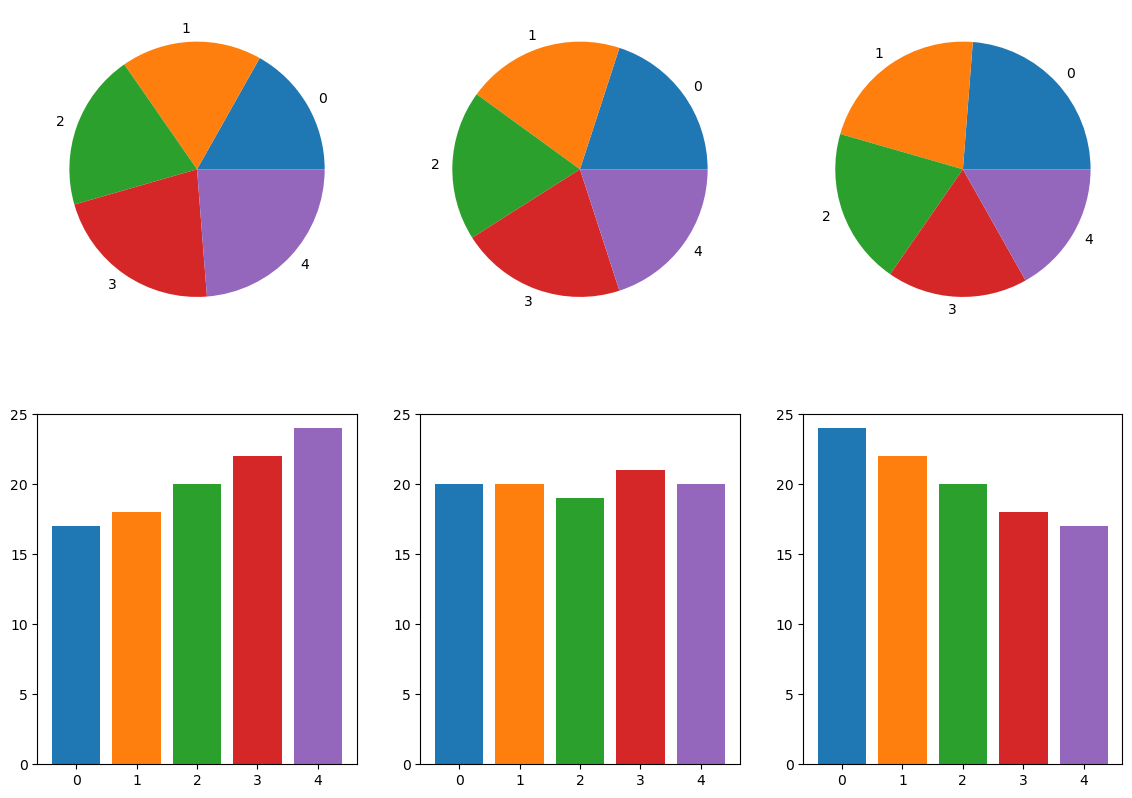

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False)
fig.set_size_inches(14, 10)

axs[0][0].pie(dataA, labels=range(5))
axs[0][1].pie(dataB, labels=range(5))
axs[0][2].pie(dataC, labels=range(5))

axs[1][0].bar(x=range(5), height=dataA, color=colors)
axs[1][0].set_ylim(0, 25)

axs[1][1].bar(x=range(5), height=dataB, color=colors)
axs[1][1].set_ylim(0, 25)

axs[1][2].bar(x=range(5), height=dataC, color=colors)
axs[1][2].set_ylim(0, 25)

As you can see, the differences are much more easily seen in the bar plots! This is also a nice illustration of how you can easily combine multiple different subplots into a compelling figure

Notice also, that, by default the matplotlib bar function uses the same color for all the bars in the same data series while it uses a different color for each pie slidce. We got around this by setting the colors of each bar manually. To make sure that the colors matched the ones used in the pie plots, we manually obtained the colors from the color cycle that matplotlib lib uses. 

A similar effect could have been obtained by calling **plt.bar** for each individual bar:

<BarContainer object of 1 artists>

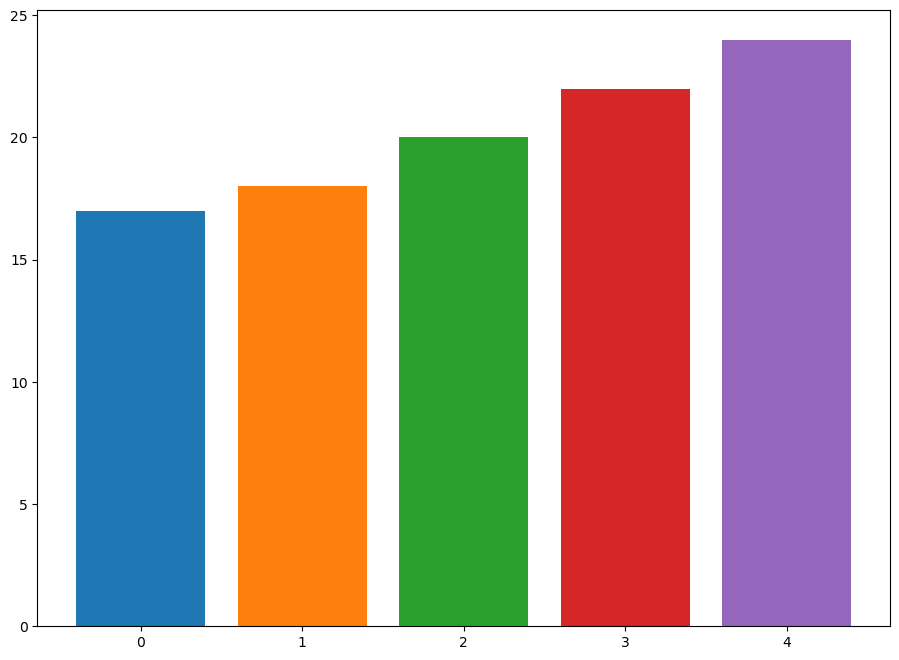

In [23]:
plt.bar(x=0, height=17)
plt.bar(x=1, height=18)
plt.bar(x=2, height=20)
plt.bar(x=3, height=22)
plt.bar(x=4, height=24)

# Patches

**matplotlib** also includes support for different types of shapes, called **patches**, such as Circle, Rectangle, Arrow, etc.. See https://matplotlib.org/api/patches_api.html for a complete list. Let's make a simple optical illusion using just rectangles.

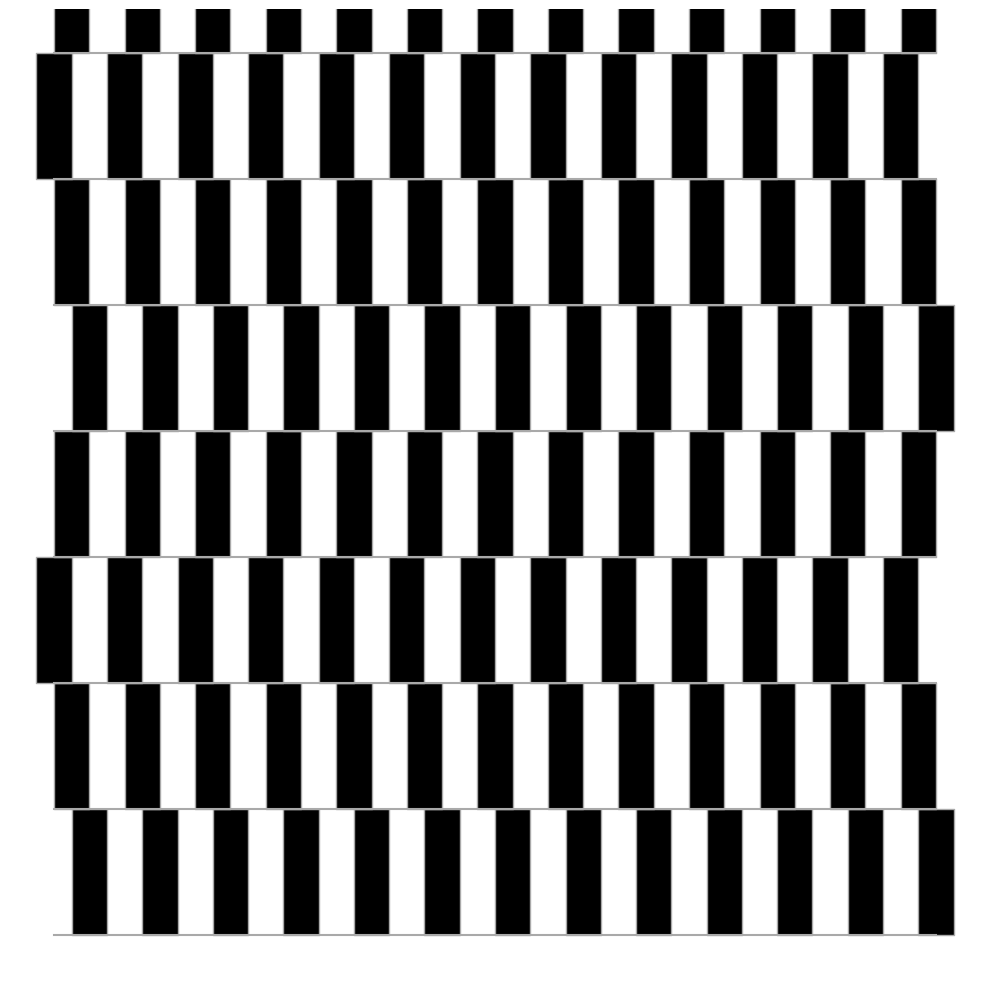

In [24]:
fig, ax = plt.subplots(1, figsize=(10, 10))
#ax = plt.gca()

squares = []

for i in range(8):
    ax.plot([0, 25], [i, i], 'darkgrey')
    
    for j in range(0, 26, 2):
        sq = Rectangle((j+0.5*np.sin((i+1)*np.pi/2), i), 1, 1, fill=True)
        squares.append(sq)

pc = PatchCollection(squares, facecolor='black', edgecolor='darkgrey')
ax.add_collection(pc)
ax.axis('off')
fig.tight_layout()

It should be noted that Patches are not plotted directly. Instead a list of patches is added to a **PatchCollection** object that is then plotted by using **ax.add_collection**. 

# Bubble plot

We've covered the most fundamental functionality of **matplotlib**. With some creativity, we're already able to create some sophisticated types of visualizations. Let's start by loading some data from https://www.gapminder.org/

In [25]:
data = pd.read_csv('data/gapminder.csv')

And define some useful arrays.

In [26]:
colors = np.array([
    '#5A6FFA',
    '#E60DA1',
    "#7E7E7E",
    "#B7F025",
    "#FF9A1E"])

continents = [
    'Africa',
    'Americas',
    'Asia',
    'Europe',
    'Oceania']

Let's take a look at the data

In [27]:
data.head()

Country           GDP  Population  LifeExpectancy  Continent
0       Algeria   6223.367465    33333216          72.301          0
1        Angola   4797.231267    12420476          42.731          0
2         Benin   1441.284873     8078314          56.728          0
3      Botswana  12569.851770     1639131          50.728          0
4  Burkina Faso   1217.032994    14326203          52.295          0

As we can see, there are several features associated with each country. Here we will create a Bubble plot to encode all 4 features in a single plot:

-  GDP - x-axis, log scale
-  Life Expectancy - y-axis, linear scale
-  Population - bubble size/area
-  Continent - bubble color

Finally, we will manually add a legend using **ax.text** to write the name of each continent with the respective color. 

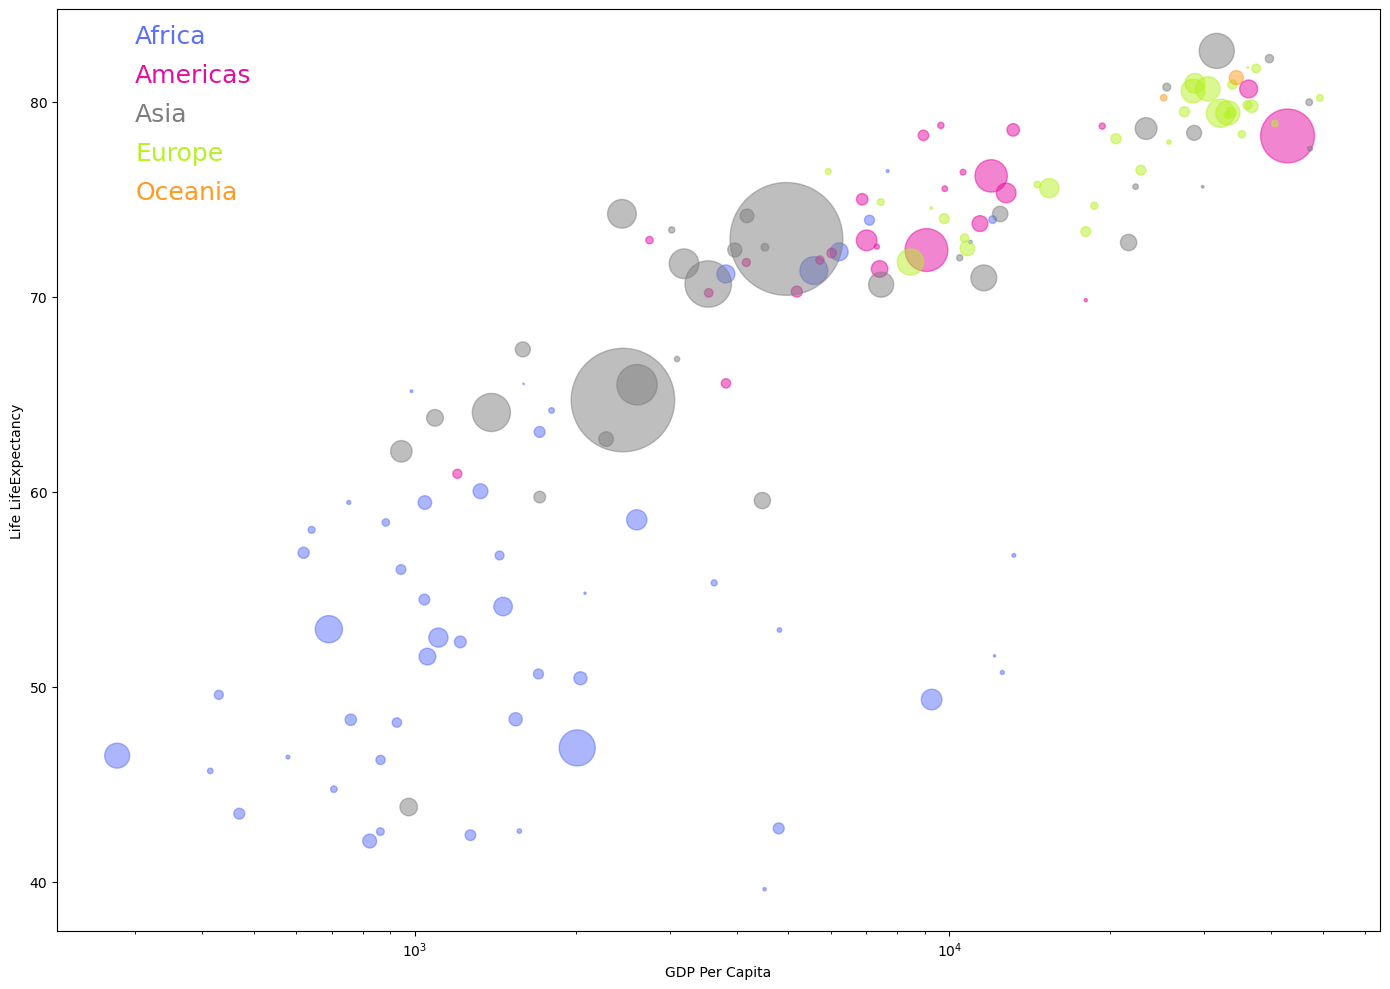

In [28]:
fig = plt.figure()
ax = plt.gca()

fig.set_size_inches(14, 10)

for i in range(5):
    continent = data[data['Continent']==i]
    
    ax.scatter(continent['GDP'], # x-axis
               continent['LifeExpectancy'], # y-axis
               s=continent['Population']/200000, # Bubble size
               c=colors[i], # Bubble color
               alpha=0.5) # Transparency

ax.set_xscale('log')

# Add the legend manually
for i in range(len(continents)):
    ax.text(300, 83-i*2, continents[i], color=colors[i], fontsize=18)

ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life LifeExpectancy')

fig.tight_layout()

This kind of plot was made famoous by Hans Rosling, one of the great science communicators of our time, during his Gapminder Foundation work. If you haven't seen it, I highly recommend his [TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w) and his recent (postumous) book [Factfulness: Ten Reasons We're Wrong About the World](https://www.amazon.com/Factfulness-Reasons-Wrong-Things-Better-ebook/dp/B0769XK7D6)

# Age pyramid

Another well known plot type that we can easily build is age pyramids. Let's start by loading some data:

In [29]:
pyramid = pd.read_csv('data/pyramid.csv')

This is the Mombasa Population Pyramid Age Groups in 2009 we downloaded from: http://www.opendata.go.ke/datasets/55d384fb963a47d2ad9f131240abfb7c_0/data.

In [30]:
pyramid.head()

Age  Female    Male  Male_Inverse  OBJECTID
0   0 - 10  113083  114153       -114153         0
1  10 - 20   88861   80755        -80755         1
2  20 - 30  130033  120694       -120694         2
3  30 - 40   66020   92146        -92146         3
4  40 - 50   28289   45107        -45107         4

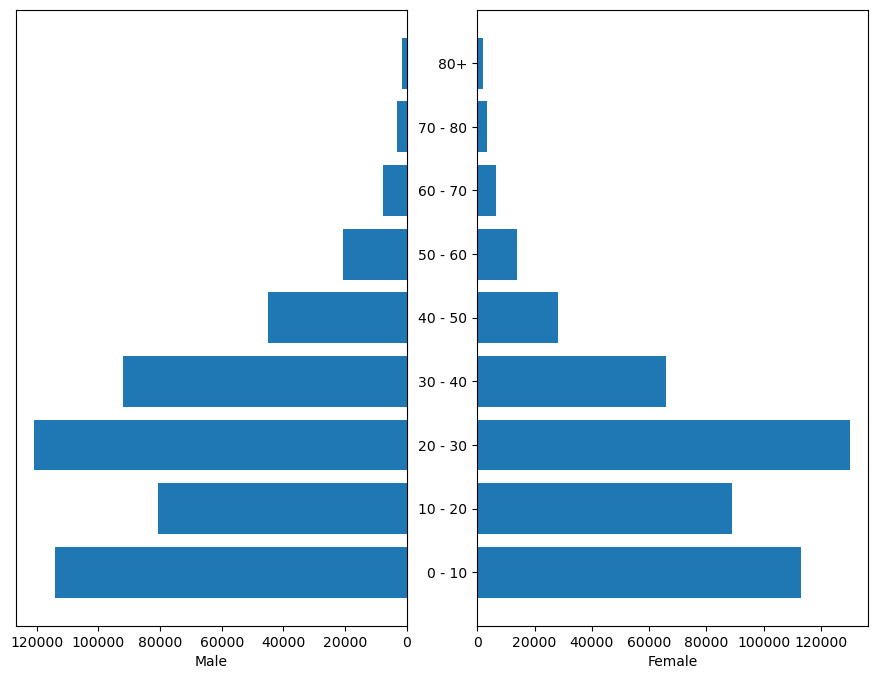

In [31]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=False)
axs[0].barh(range(9), pyramid['Male'])
axs[1].barh(range(9), pyramid['Female'])

axs[0].invert_xaxis()
axs[0].set_yticks([])
axs[0].set_yticklabels('')

axs[1].set_yticks(range(9))
axs[1].set_yticklabels(pyramid['Age'])

axs[0].set_xlabel('Male')
axs[1].set_xlabel('Female')

fig.subplots_adjust(wspace=0.18)

Here we used **barh** the horizontal version of the bar plots, and **invert_axis** to flip the direction of the *x-axis* in the first subplot.

# Candle stick plots

A very common type of plot in finance is the Candle stick plot. We start by loading weekly values for the DJIA from [Yahoo! Finance](https://finance.yahoo.com/quote/%5EDJI/history?period1=1388552400&period2=1575090000&interval=1wk&filter=history&frequency=1wk)

In [32]:
djia = pd.read_csv('data/DJIA.csv')

Let's keep only the last 52 points (1 year) for clarity of the figure

In [33]:
djia = djia.iloc[-52:]

In [34]:
djia.head()

Date          Open          High           Low         Close  \
257  2018-12-05  24737.419922  25095.619141  23881.369141  24370.240234   
258  2018-12-12  24509.089844  24828.289063  23456.880859  23675.640625   
259  2018-12-19  23693.330078  24057.339844  21792.199219  21792.199219   
260  2018-12-26  21857.730469  23381.880859  21712.529297  23327.460938   
261  2019-01-02  23058.609375  23864.650391  22638.410156  23787.449219   

        Adj Close      Volume  
257  24370.240234  1602570000  
258  23675.640625  1936050000  
259  21792.199219  2289180000  
260  23327.460938  1466360000  
261  23787.449219  1793450000

Candle sticks combine bars and lines to allows to visualize __Open__, __Close__, __High__, and __Low__ values at the same time

In [35]:
opens = djia['Open'].values
closes = djia['Close'].values
highs = djia['High'].values
lows = djia['Low'].values

We start by calculating the change between the open and close values. This will correspond to the height of our bars

In [36]:
changes = closes-opens

Positive changes will be depicted in green and negative changes in red, so we split our dataset.

In [37]:
ups = changes > 0
downs = ~ups

For convenience we also generate an array for the positions of the bars

In [38]:
pos = np.arange(djia.shape[0])

And define the coordinates of the lines. The line for each candle stick goes from High to Low. We can plot multiple lines at the same time by providing a 2D array of X and Y coordinates to __plt.plot__, in which case, a line will be plotted for each column. We generate these arrays now

In [39]:
x = np.vstack([pos, pos])
y = np.vstack([highs, lows])

In [40]:
y

array([[25095.619141, 24828.289063, 24057.339844, 23381.880859,
        23864.650391, 24099.140625, 24750.220703, 24860.150391,
        25427.320313, 25458.980469, 25961.439453, 26241.419922,
        26155.980469, 25837.609375, 26109.679688, 26009.900391,
        26280.900391, 26487.570313, 26530.710938, 26695.960938,
        26680.580078, 26689.390625, 26118.099609, 25957.630859,
        25878.210938, 25343.769531, 26248.669922, 26527.189453,
        26907.369141, 26890.640625, 26966.      , 27398.679688,
        27368.810547, 27298.429688, 27281.650391, 26426.970703,
        26222.320313, 26388.779297, 26514.619141, 26909.429688,
        27306.730469, 27272.169922, 27046.210938, 26655.839844,
        27120.109375, 27112.160156, 27167.880859, 27560.359375,
        27774.669922, 28090.210938, 28146.019531, 28174.970703],
       [23881.369141, 23456.880859, 21792.199219, 21712.529297,
        22638.410156, 23703.160156, 24088.900391, 24307.169922,
        24790.900391, 24883.039063, 253

In [41]:
y.shape

(2, 52)

Finally, we explictly use __zorder__ to make sure that the lines stay __below__ the bars

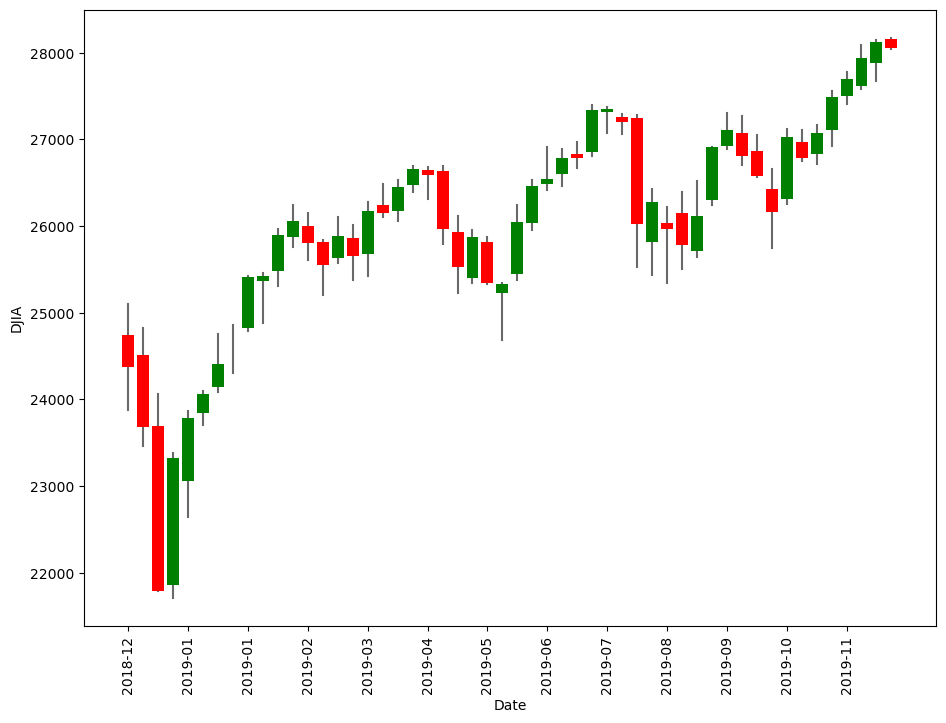

In [42]:
fig, ax = plt.subplots(1)

ax.bar(x=pos[ups],   height=changes[ups],    bottom=opens[ups],    color='g', zorder=2)
ax.bar(x=pos[downs], height=-changes[downs], bottom=closes[downs], color='r', zorder=2)
ax.plot(x, y, color='dimgray', zorder=1)

ax.set_xticks(pos[::4])
ax.set_xticklabels([date[:7] for date in djia['Date'].values[::4]], rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('DJIA');

# Waterfall Plot

A more sophisticated version of a candle stick plot is a waterfall plot that is used to track changes between two total values.  For this we will use the data for 2019 and 2020 directly from the [Bureau of Economic Analysis](https://www.bea.gov/) website. We'll focus on Table 14: "Gross Domestic Product by Industry Group: Level and Change from Preceding Period" as that includes the year to year change.

In [43]:
data = pd.read_excel('https://www.bea.gov/sites/default/files/2020-09/gdp2q20_3rd.xlsx',
                     sheet_name='Table 14', skiprows=2, header=[0, 1, 2]
                    ).dropna()

Set the index to be the category names

In [44]:
data.set_index(data.columns[1], inplace=True)

Select the columns we're interested in

In [45]:
select_columns = [col for col in data.columns
                  if col[0] == 'Seasonally adjusted at annual rates'
                 and col[2][-2] != '.' ]

seasonal = data[select_columns].copy()

Clean the column names

In [46]:
column_names = [str(col[1])+'.'+col[2] for col in data.columns 
                  if col[0] == 'Seasonally adjusted at annual rates'
                 and col[2][-2] != '.']

Rename the columns

In [47]:
seasonal.columns=column_names
seasonal.index.name=None

In [48]:
seasonal

2019.Q2  2019.Q3  2019.Q4  \
Gross domestic product                              21329.9  21540.3  21747.4   
Private industries                                  18703.8  18887.2  19075.1   
Agriculture, forestry, fishing, and hunting           172.8    178.0    180.4   
Mining                                                319.2    301.2    300.6   
Utilities                                             332.7    338.6    340.6   
Construction                                          887.4    897.7    905.5   
Manufacturing                                        2340.7   2348.7   2370.1   
Durable goods                                        1319.2   1317.7   1328.0   
Nondurable goods                                     1021.5   1031.0   1042.1   
Wholesale trade                                      1253.8   1268.0   1270.4   
Retail trade                                         1156.0   1173.2   1180.3   
Transportation and warehousing                        690.7    703.6    710.0   
Information                                          1122.3   1137.0   1156.1   
Finance, insurance, real estate, rental, and le...   4523.3   4557.9   4615.5   
Finance and insurance                                1663.7   1656.5   1693.2   
Real estate and rental and leasing                   2859.6   2901.4   2922.3   
Professional and business services                   2693.1   2727.6   2753.9   
Professional, scientific, and technical services     1624.9   1651.9   1668.0   
Management of companies and enterprises               412.2    410.8    413.6   
Administrative and waste management services          656.1    664.9    672.3   
Educational services, health care, and social a...   1853.5   1875.4   1898.4   
Educational services                                  267.9    271.6    275.3   
Health care and social assistance                    1585.6   1603.8   1623.1   
Arts, entertainment, recreation, accommodation,...    900.3    916.0    923.4   
Arts, entertainment, and recreation                   236.3    240.4    243.5   
Accommodation and food services                       664.0    675.6    680.0   
Other services, except government                     458.1    464.4    469.7   
Government                                           2626.0   2653.1   2672.3   
Federal                                               809.8    816.6    822.2   
State and local                                      1816.3   1836.6   1850.1   
Private goods-producing industries 1                 3720.1   3725.5   3756.6   
Private services-producing industries 2             14983.7  15161.7  15318.4   

                                                    2020.Q1  2020.Q2  
Gross domestic product                              21561.1  19520.1  
Private industries                                  18879.0  16925.5  
Agriculture, forestry, fishing, and hunting           190.2    142.4  
Mining                                                248.3    136.3  
Utilities                                             333.8    333.2  
Construction                                          914.6    853.7  
Manufacturing                                        2346.3   2053.7  
Durable goods                                        1309.7   1145.5  
Nondurable goods                                     1036.6    908.2  
Wholesale trade                                      1258.6   1111.9  
Retail trade                                         1180.7   1102.1  
Transportation and warehousing                        686.0    520.2  
Information                                          1156.8   1115.7  
Finance, insurance, real estate, rental, and le...   4607.5   4564.7  
Finance and insurance                                1663.9   1699.8  
Real estate and rental and leasing                   2943.6   2864.8  
Professional and business services                   2751.7   2524.9  
Professional, scientific, and technical services     1670.5   1547.4  
Management of companies and e

Remove subtotal rows

In [49]:
subtotals=[
    'Private industries', 
    'Manufacturing', 
    'Finance, insurance, real estate, rental, and leasing',
    'Professional and business services',
    'Educational services, health care, and social assistance',
    'Arts, entertainment, recreation, accommodation, and food services',
    'Government',
    'Private goods-producing industries 1',
    'Private services-producing industries 2'
]

seasonal.drop(index=subtotals, inplace=True)

Keep only the columns we will use:

In [50]:
seasonal = seasonal[['2019.Q2', '2020.Q2']].copy()

And compute the change between them

In [51]:
seasonal['diff'] = seasonal[['2019.Q2', '2020.Q2']].apply(lambda x: x.iloc[1]-x.iloc[0], axis=1)
seasonal

2019.Q2  2020.Q2    diff
Gross domestic product                            21329.9  19520.1 -1809.8
Agriculture, forestry, fishing, and hunting         172.8    142.4   -30.4
Mining                                              319.2    136.3  -182.9
Utilities                                           332.7    333.2     0.5
Construction                                        887.4    853.7   -33.7
Durable goods                                      1319.2   1145.5  -173.7
Nondurable goods                                   1021.5    908.2  -113.3
Wholesale trade                                    1253.8   1111.9  -141.9
Retail trade                                       1156.0   1102.1   -53.9
Transportation and warehousing                      690.7    520.2  -170.5
Information                                        1122.3   1115.7    -6.6
Finance and insurance                              1663.7   1699.8    36.1
Real estate and rental and leasing                 2859.6   2864.8     5.2
Professional, scientific, and technical services   1624.9   1547.4   -77.5
Management of companies and enterprises             412.2    397.6   -14.6
Administrative and waste management services        656.1    579.9   -76.2
Educational services                                267.9    244.6   -23.3
Health care and social assistance                  1585.6   1374.9  -210.7
Arts, entertainment, and recreation                 236.3     98.2  -138.1
Accommodation and food services                     664.0    378.1  -285.9
Other services, except government                   458.1    371.0   -87.1
Federal                                             809.8    837.7    27.9
State and local                                    1816.3   1756.9   -59.4

Append the total values at the bottom of the DataFrame

In [52]:
seasonal = pd.concat([seasonal, seasonal.iloc[[0]]], axis=0)

Update the row names

In [53]:
row_names = list(seasonal.index)
row_names[0] = '2019'
row_names[-1] = '2020'
seasonal.index=row_names

seasonal

2019.Q2  2020.Q2    diff
2019                                              21329.9  19520.1 -1809.8
Agriculture, forestry, fishing, and hunting         172.8    142.4   -30.4
Mining                                              319.2    136.3  -182.9
Utilities                                           332.7    333.2     0.5
Construction                                        887.4    853.7   -33.7
Durable goods                                      1319.2   1145.5  -173.7
Nondurable goods                                   1021.5    908.2  -113.3
Wholesale trade                                    1253.8   1111.9  -141.9
Retail trade                                       1156.0   1102.1   -53.9
Transportation and warehousing                      690.7    520.2  -170.5
Information                                        1122.3   1115.7    -6.6
Finance and insurance                              1663.7   1699.8    36.1
Real estate and rental and leasing                 2859.6   2864.8     5.2
Professional, scientific, and technical services   1624.9   1547.4   -77.5
Management of companies and enterprises             412.2    397.6   -14.6
Administrative and waste management services        656.1    579.9   -76.2
Educational services                                267.9    244.6   -23.3
Health care and social assistance                  1585.6   1374.9  -210.7
Arts, entertainment, and recreation                 236.3     98.2  -138.1
Accommodation and food services                     664.0    378.1  -285.9
Other services, except government                   458.1    371.0   -87.1
Federal                                             809.8    837.7    27.9
State and local                                    1816.3   1756.9   -59.4
2020                                              21329.9  19520.1 -1809.8

Fix the first and last rows of the diff column to be the totals instead of the changes

In [54]:
seasonal.loc['2019', 'diff'] = seasonal.loc['2019', '2019.Q2']
seasonal.loc['2020', 'diff'] = seasonal.loc['2020', '2020.Q2']

Extract the diff column and add a sequential index to use as the x coordinate

In [55]:
waterfall = seasonal[['diff']].copy()
waterfall['pos'] = np.arange(waterfall.shape[0])

Compute the top and bottom of each individual bar. For this we must calculate the cumulative sum, starting from the original value and adding each difference in turn until we reach the final value. These values determine the range of each bar

In [56]:
waterfall['bottom'] = waterfall['diff'].shift(1).cumsum()
waterfall['top'] = waterfall['diff'].cumsum()
waterfall.fillna(0, inplace=True)

Adjust the final value positions

In [57]:
waterfall.loc['2020', 'bottom'] = 0
waterfall.loc['2020', 'top'] = waterfall.loc['2020', 'diff']
waterfall

diff  pos   bottom  \
2019                                              21329.9    0      0.0   
Agriculture, forestry, fishing, and hunting         -30.4    1  21329.9   
Mining                                             -182.9    2  21299.5   
Utilities                                             0.5    3  21116.6   
Construction                                        -33.7    4  21117.1   
Durable goods                                      -173.7    5  21083.4   
Nondurable goods                                   -113.3    6  20909.7   
Wholesale trade                                    -141.9    7  20796.4   
Retail trade                                        -53.9    8  20654.5   
Transportation and warehousing                     -170.5    9  20600.6   
Information                                          -6.6   10  20430.1   
Finance and insurance                                36.1   11  20423.5   
Real estate and rental and leasing                    5.2   12  20459.6   
Professional, scientific, and technical services    -77.5   13  20464.8   
Management of companies and enterprises             -14.6   14  20387.3   
Administrative and waste management services        -76.2   15  20372.7   
Educational services                                -23.3   16  20296.5   
Health care and social assistance                  -210.7   17  20273.2   
Arts, entertainment, and recreation                -138.1   18  20062.5   
Accommodation and food services                    -285.9   19  19924.4   
Other services, except government                   -87.1   20  19638.5   
Federal                                              27.9   21  19551.4   
State and local                                     -59.4   22  19579.3   
2020                                              19520.1   23      0.0   

                                                      top  
2019                                              21329.9  
Agriculture, forestry, fishing, and hunting       21299.5  
Mining                                            21116.6  
Utilities                                         21117.1  
Construction                                      21083.4  
Durable goods                                     20909.7  
Nondurable goods                                  20796.4  
Wholesale trade                                   20654.5  
Retail trade                                      20600.6  
Transportation and warehousing                    20430.1  
Information                                       20423.5  
Finance and insurance                             20459.6  
Real estate and rental and leasing                20464.8  
Professional, scientific, and technical services  20387.3  
Management of companies and enterprises           20372.7  
Administrative and waste management services      20296.5  
Educational services                              20273.2  
Health care and social assistance                 20062.5  
Arts, entertainment, and recreation               19924.4  
Accommodation and food services                   19638.5  
Other services, except government                 19551.4  
Federal                                           19579.3  
State and local                                   19519.9  
2020                                              19520.1

Extract the x values

In [58]:
pos = [waterfall.pos[:-1], # x-values
       waterfall.pos[1:]]

Compute the color of each bar. Positive changes are shown in green and negative differences in red. The initial and final totals are in purple.

In [59]:
bar_colors = ['#cf51f9'] + \
['#70bf41' if value > 0 else '#f9517b' for value in waterfall['diff'][1:-1]] + \
['#cf51f9']

Utility function to add the value labels above each bar

In [60]:
def draw_labels(x):
    ax = plt.gca()
    
    ax.text(x=x['pos'], y=max([x['top'],x['bottom']]), 
            s='%u' % x['diff'],
            verticalalignment='bottom', 
            horizontalalignment='center',
           fontsize=16)

Generate the final figure

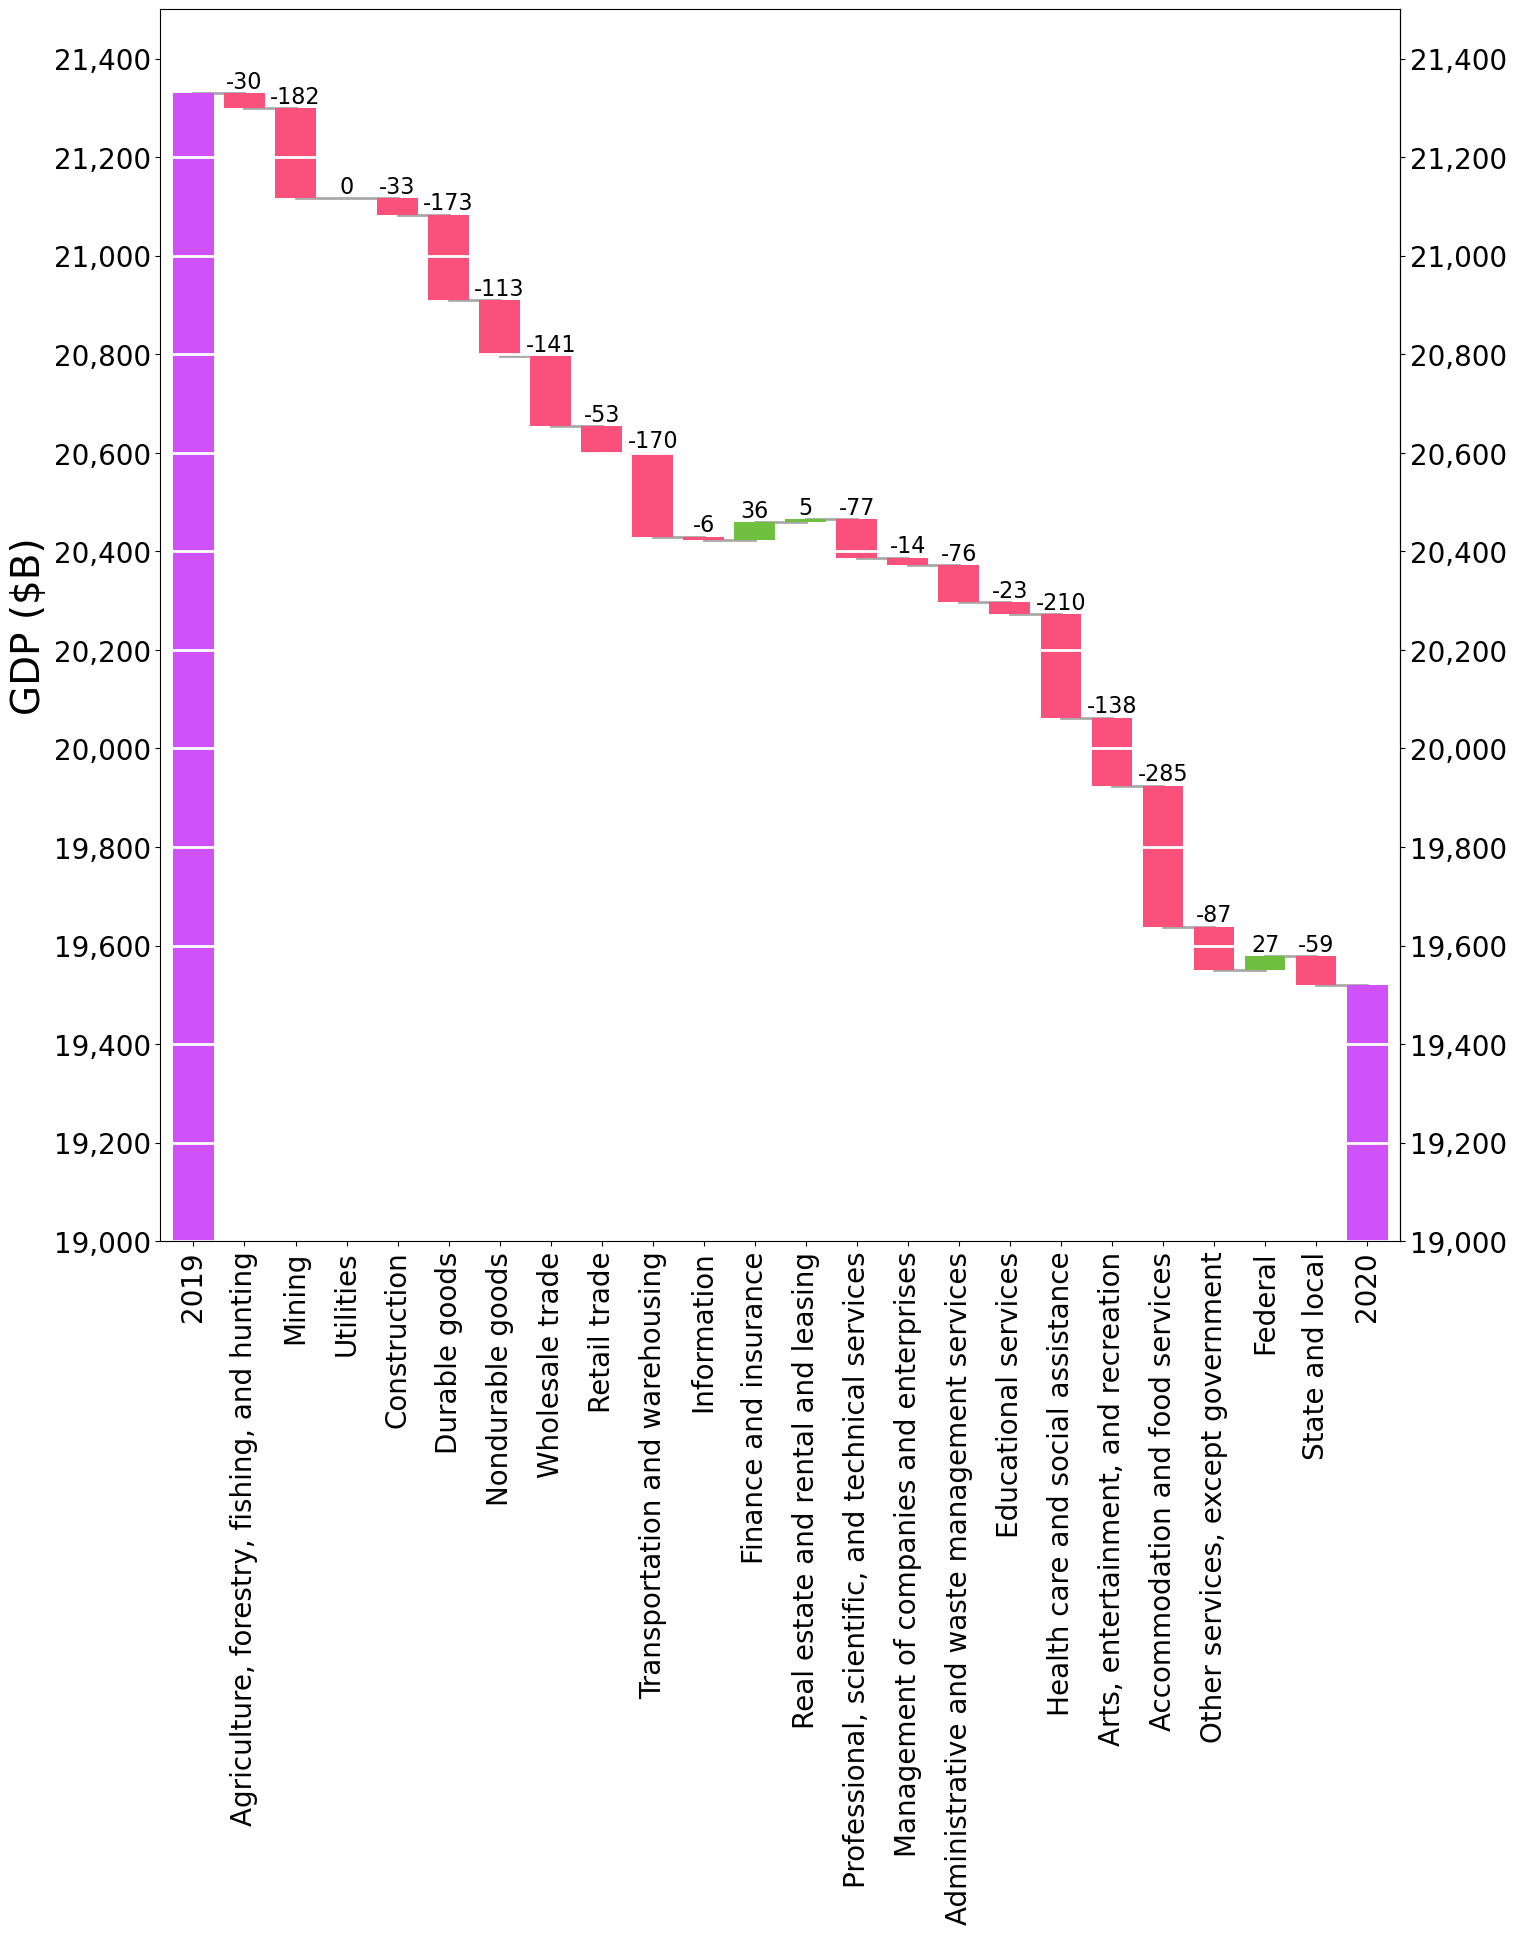

In [61]:
fig, ax = plt.subplots(1, figsize=(16, 16))

waterfall.plot(kind='bar', 
               bottom=waterfall['bottom'], 
               y='diff', 
               legend=False, ax=ax, color=bar_colors, width=.8)
ax.plot(pos, 
        waterfall[['top', 'top']].iloc[:-1].T,
        color='darkgray', # Color
        zorder=-2, #Plot below the current bars
        lw=2) # Make the lines thicker

# Add the value labels above each bar
waterfall.iloc[1:-1].apply(draw_labels, axis=1)

# Clean up the original y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(19000, 21500)
ax.set_yticks(np.arange(19000, 21501, 200))

# Increase tick mark font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylabel('GDP ($B)', fontsize=28)

# Add white horizontal grid lines for readability
ax.grid(axis='y', color='white', lw=2)

# Add a second y-axis on the right and format it to match the original one
ax2 = ax.secondary_yaxis('right')
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylim(19000, 21500)
ax2.set_yticks(np.arange(19000, 21501, 200))

# Increase tick mark font size
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Images

Finally, let's take a look at how we can manipulate images. Let's start by reading an image file from disk:

In [62]:
img=mpimg.imread('data/cambodja.jpg')

We can plot it easily using **imshow**

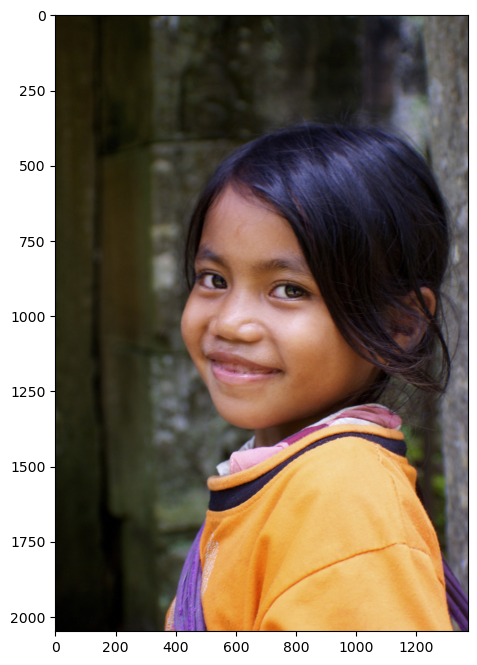

In [63]:
plt.imshow(img)

It's very useful to keep in mind that images are just arrays of numbers.

In [64]:
print(img.dtype, img.shape)

uint8 (2048, 1371, 3)


In this image we have 3 layers (one for each R, G, and B channels). We can take a look at each channel separately:

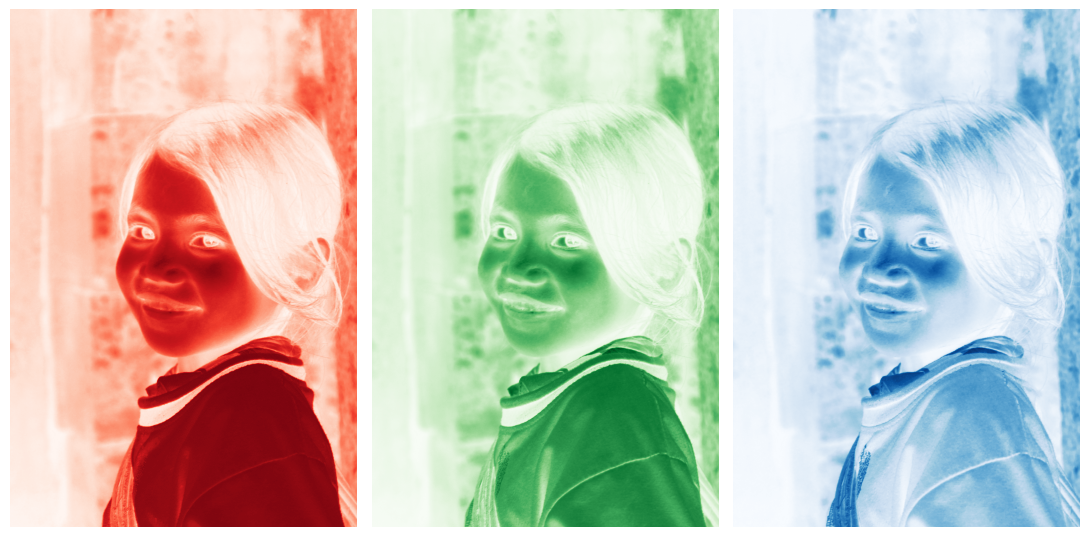

In [65]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(img[:,:,0], cmap=plt.get_cmap('Reds'))
axs[0].set_axis_off()

axs[1].imshow(img[:,:,1], cmap=plt.get_cmap('Greens'))
axs[1].set_axis_off()

axs[2].imshow(img[:,:,2], cmap=plt.get_cmap('Blues'))
axs[2].set_axis_off()

fig.tight_layout()

Here, for clarity we are using **set_axis_off()** to remove ticks, labels, etc

But we could also create a single two dimensional matrix by hand:

In [66]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

print(gradient.shape)

(2, 256)


And to plot it using a specific color map such as **viridis**

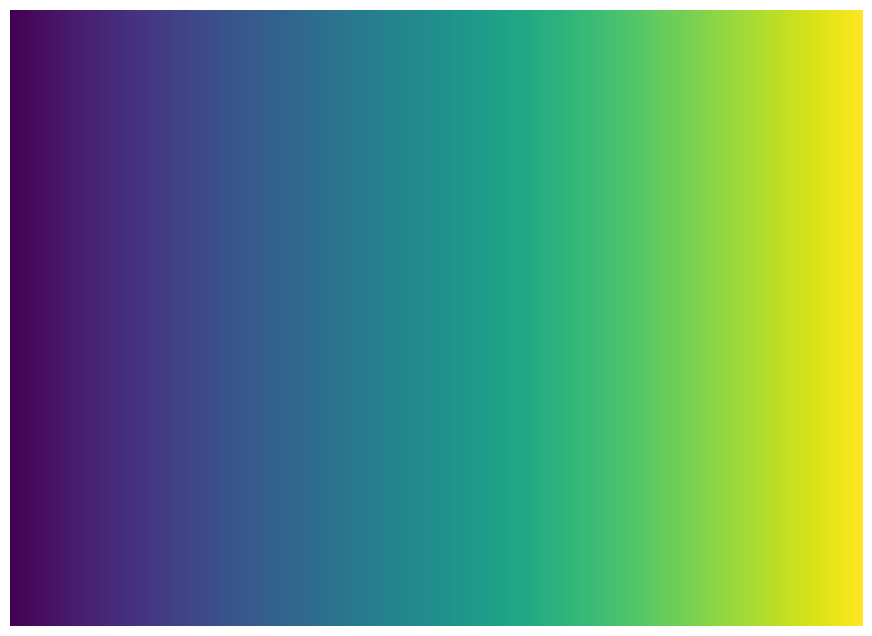

In [67]:
fig, ax = plt.subplots(1)
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('viridis'))
ax.set_axis_off()

Since images are just arrays, we can manipulate them as such. Let's start by defining some useful transformation matrices (after https://github.com/MaPePeR/jsColorblindSimulator/blob/master/colorblind.js).

In [68]:
ColorMatrixMatrixes = {
 'Achromatomaly': np.array([[61.8, 32, 6.2],
                            [16.3, 77.5, 6.2],
                            [16.3, 32, 51.6]])/100,

 'Achromatopsia': np.array([[29.9, 58.7, 11.4],
                            [29.9, 58.7, 11.4],
                            [29.9, 58.7, 11.4]])/100,

 'Deuteranomaly': np.array([[80, 20, 0],
                            [25.833, 74.167, 0],
                            [0, 14.167, 85.833]])/100,

 'Deuteranopia': np.array([[62.5, 37.5, 0],
                           [70, 30, 0],
                           [0, 30, 70]])/100,

 'Normal': np.array([[100, 0, 0],
                     [0, 100, 0],
                     [0, 0, 100]])/100,

 'Protanomaly': np.array([[81.667, 18.333, 0],
                          [33.333, 66.667, 0],
                          [0, 12.5, 87.5]])/100,

 'Protanopia': np.array([[56.667, 43.333, 0],
                         [55.833, 44.167, 0],
                         [0, 24.167, 75.833]])/100,

 'Tritanomaly': np.array([[96.667, 3.333, 0],
                          [0, 73.333, 26.667],
                          [0, 18.333, 81.667]])/100,

 'Tritanopia': np.array([[95, 5, 0],
                         [0, 43.333, 56.667],
                         [0, 47.5, 52.5]])/100
 }

With these transformation matrices we can easily manipulate the image to observe the effect of the different types of color blindness:

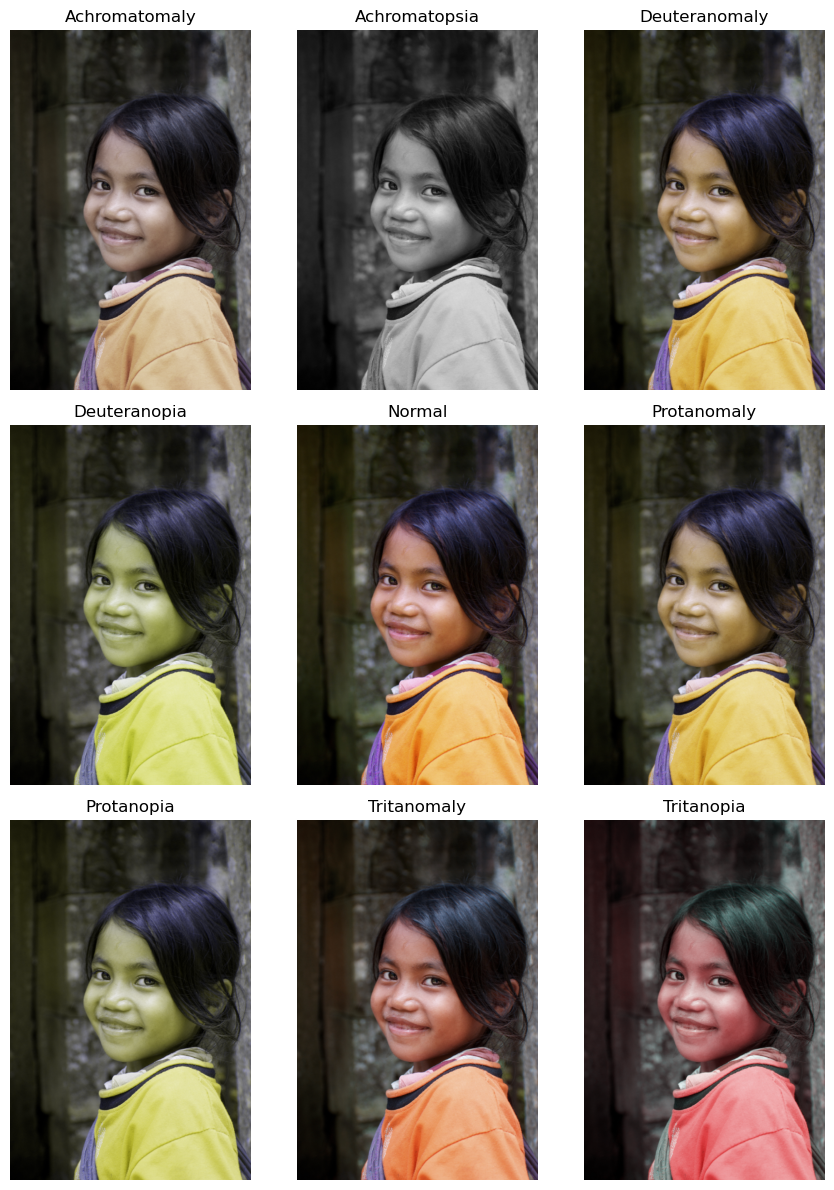

In [69]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)

names = sorted(ColorMatrixMatrixes.keys())

for i in range(len(names)):
    version = names[i]
    transformation = ColorMatrixMatrixes[version]

    img_flat = img.reshape(img.shape[0] * img.shape[1], 3)
    new_img_array = np.dot(img_flat, transformation.T).astype(img.dtype)
    new_img = new_img_array.reshape(img.shape)

    row = i//3
    col = i%3
    
    axs[row][col].imshow(new_img)
    axs[row][col].set_title(version)
    axs[row][col].axis('off')

fig.subplots_adjust(hspace=0.1, wspace=0.1)

fig.set_size_inches(9, 12)
fig.tight_layout()

# Heatmaps

Heatmaps are able to quickly display a large amount of information. We will use the standard JHU CoVID datasetfor the number of CoVID-19 cases and deaths around the world. The entire dataset is available from their [github repository](https://github.com/CSSEGISandData/COVID-19/):

In [70]:
confirmed = pd.read_csv('data/time_series_covid19_confirmed_global.csv')

For simplicity, we restrict ourselves only to the first 500 days of the pandemic

In [71]:
confirmed = confirmed[confirmed.columns[:504]].copy()

The dataset include not only the number of total cases (or deaths) by country for eah day, but also state and province level information (in some cases), as well as Latitude and Longitude data. We can obtain the country totals by aggregating over all the regions. The easiest way to do this is to remove the extraneous columns and sum by column

In [72]:
del_columns = [
 'Province/State',
 'Lat',
 'Long',
]

For convenience, we also transpose the data so that each row corresponds to a specific date. This will make it easier to select specific countries for plotting

In [73]:
confirmed

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/26/21  5/27/21  \
0          0        0        0        0        0  ...    67743    68366   
1          0        0        0        0        0  ...   132244   132264   
2          0        0        0        0        0  ...   127646   127926   
3          0        0        0        0        0  ...    13671    13682   
4          0        0        0        0        0  ...    33338    33607   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...   306795   306795   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     6688     6696   
287        0        0        0        0        0  ...    93627    93947   
288        0        0        0        0        0  ...    38819    38854   

     5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  6/4/21  
0      69130    70111    70761    71838   72977   74026   75119   76628  
1     132285   132297   132309   132315  132337  132351  132360  132372  
2     128198   128456   128725   128913  129218  129640  129976  130361  
3      13693    13693    13693    13727   13729   13744   13752   13758  
4      33944    34180    34366    34551   34752   34960   35140   35307  
..       ...      ...      ...      ...     ...     ...     ...     ...  
284   307569   307838   308048   308350  308732  309036  309333  309644  
285        0        0        0        0       0       0       0       0  
286     6723     6731     6737     6742    6751    6759    6767    6773  
287    94430    94751    95050    95263   95821   96563   97388   98376  
288    38918    38933    38944    38961   38998   39031   39092   39144  

[289 rows x 504 columns]

In [74]:
confirmed_timeline = confirmed.drop(columns=del_columns).groupby('Country/Region').sum().T
confirmed_timeline.index = pd.to_datetime(confirmed_timeline.index, format="mixed")

### Peak times

The number of cases can vary significantly from country to country, making it harder to compare countries using time series as we've seen above. One way around it is to use a heatmap on the daily number of cases normalized by the peak value. For clarity, we start by subsetting just the countries with more than 100,000 cases

In [75]:
selected_countries = confirmed_timeline.T[confirmed_timeline.max(axis=0)>100000].index

And normalize it by the peak value

In [76]:
peaks = confirmed_timeline[selected_countries].diff(1).rolling(7).mean().T.apply(lambda x:x/x.max(), axis=1)

And sort the countries by the peak date

In [77]:
sorted_countries = confirmed_timeline.iloc[-1].sort_values(ascending=False).iloc[:50].index

EDIT: Truncating at 50 countries for readability

In [78]:
len(sorted_countries)

50

And finally, we make the heat map with all the countries in order

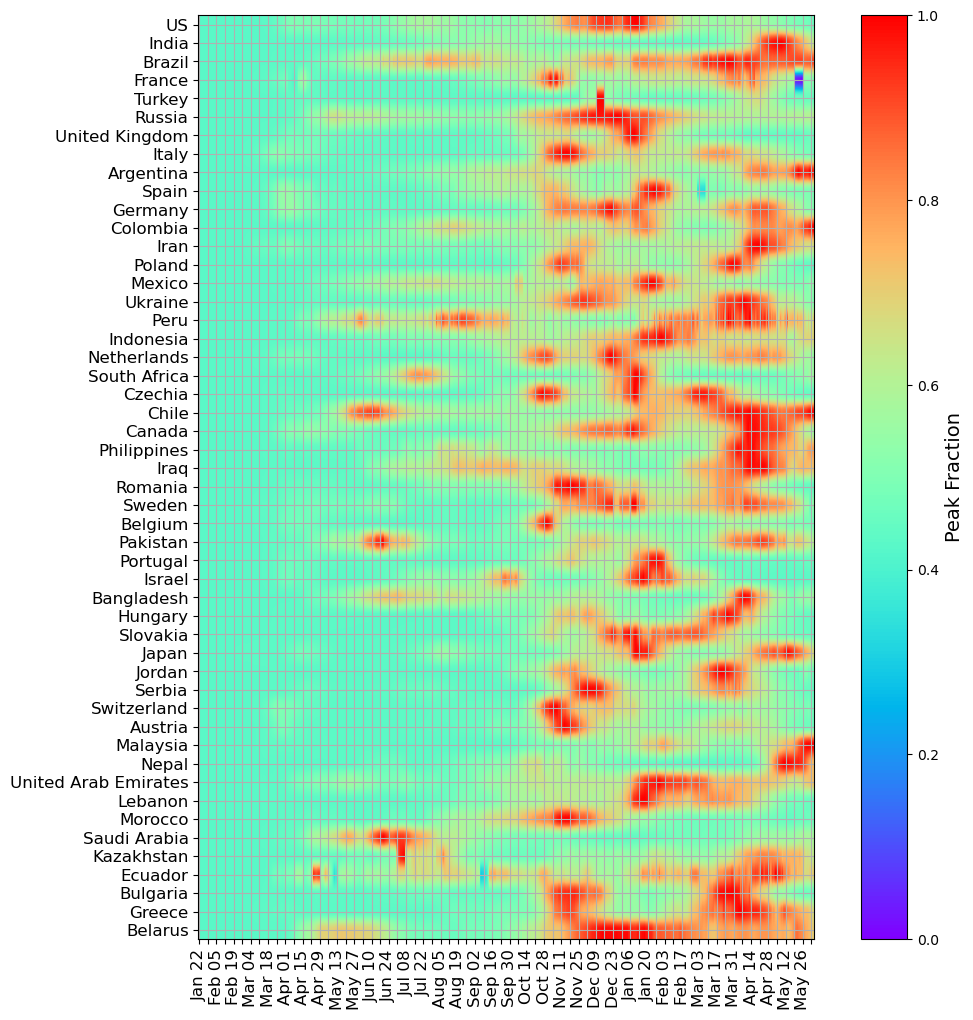

In [79]:
fig, ax = plt.subplots(1, figsize=(12, 12))

norm = matplotlib.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Peak Fraction', fontsize=14)

ax.imshow(peaks.loc[sorted_countries].fillna(0).values, cmap=plt.cm.rainbow)
ax.set_xticks(np.arange(0, peaks.shape[1], 7))
ax.set_xticklabels([day.strftime("%b %d") if i%2 == 0  else '' 
                    for i, day in enumerate(peaks.columns[::7]) ], 
                   fontsize=12, rotation=90)
ax.set_yticks(np.arange(0, len(sorted_countries)))
ax.set_yticklabels(sorted_countries, fontsize=12)
ax.set_aspect(15)
ax.grid()
fig.patch.set_facecolor('#FFFFFF')

# Joyplot

Joyplots are named after the cover of the 1979 “[[Joy Division]](https://en.wikipedia.org/wiki/Joy_Division)” album “[[Unknown Pleasures]](https://en.wikipedia.org/wiki/Unknown_Pleasures)” and are a good way of ploting a lot of related timeseries into a single plot

The data is from a scientific paper on pulsars and can be downloaded from this URL. See https://www.mathworks.com/matlabcentral/fileexchange/75147-joyplot-ridgeline-data-representation

In [80]:
data = np.loadtxt('data/pulsar.csv', delimiter=',')

In total we have 80 curves with 300 points each

In [81]:
data.shape

(80, 300)

Which can be hard to visualize if we are not careful

<Axes: >

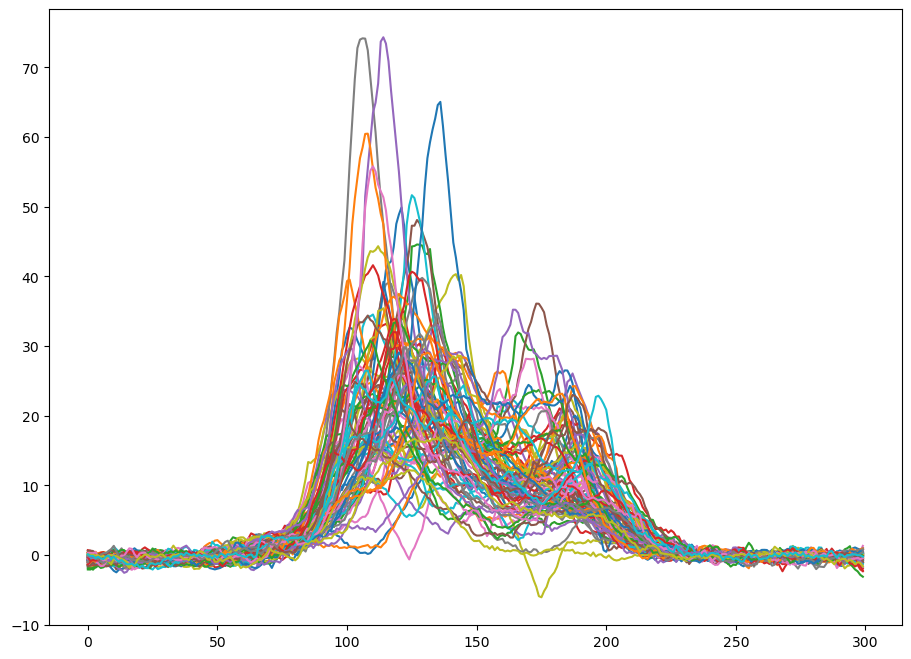

In [82]:
df = pd.DataFrame(data)
df.T.plot(legend=False)

The main trick with joy plots it to use a y axis shift for each curve in order to create the illusion of a 3D plot

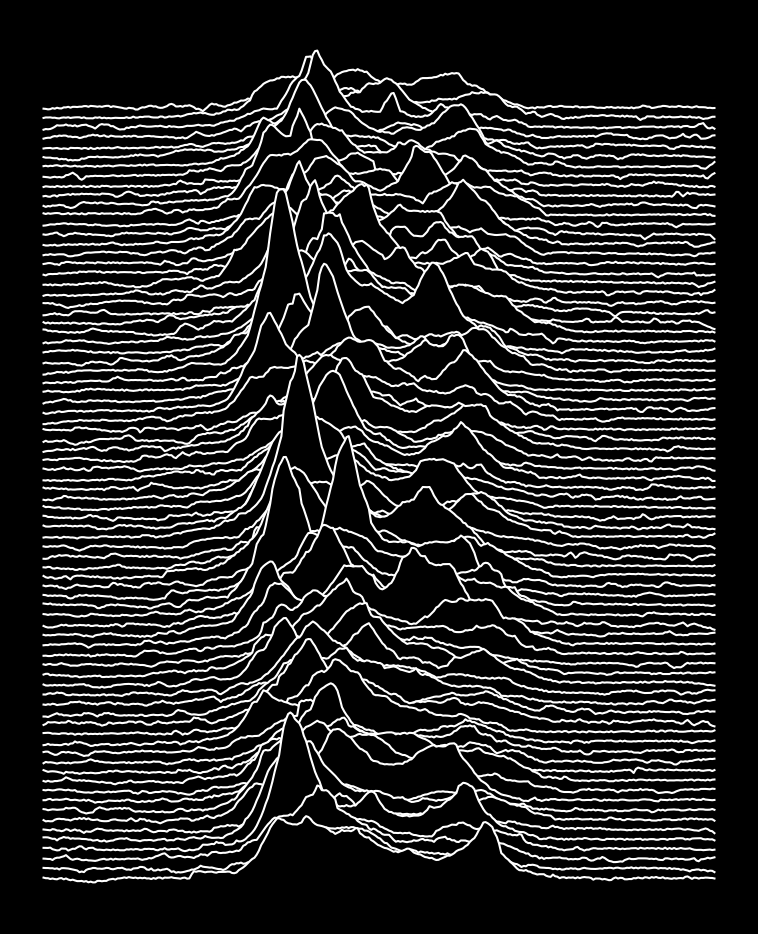

In [83]:
# Initialize figure to some reasonable sie
fig, ax = plt.subplots(1, figsize=(7.68, 9.45))

# Compute the x and y coordinates to use as references for each curve 
x = np.arange(0, data.shape[1])
y = np.arange(data.shape[1])[::-1]*4 # We're separating each curve by 4 units

# Make sure the background is black
fig.set_facecolor('black') 
ax.set_facecolor('black') 

# Plot each curve, one at a time
for i in range(data.shape[0]):
    # Use fill_between to generate a filled shape
    ax.fill_between(x, y[i]+data[i], y[i], 
    # Facecolor is still black and fix the plotting order
                    facecolor='black', zorder=i)
    
    # Manually add the edge only on the top of the shape
    ax.plot(x,         y[i]+data[i], 
    # With the same plotting order
                    color='white', zorder=i)

# Remove axis decorations
ax.axis('off')

# Remove extraneous white space
fig.tight_layout()

# Rose Plots

In [84]:
data = pd.read_excel('data/Nightingale.xlsx')

In [85]:
data.head()

Month  Year      Cause of Death  Monthly Death Total  \
0   April  1854  Infectious Disease                    1   
1     May  1854  Infectious Disease                   12   
2    June  1854  Infectious Disease                   11   
3    July  1854  Infectious Disease                  359   
4  August  1854  Infectious Disease                  828   

   Annual Mortality Rate (per 1000 soldiers)  
0                                        1.4  
1                                        6.2  
2                                        4.7  
3                                      150.0  
4                                      328.5

Combine month and year into a single column

In [86]:
data['date'] = data[['Month', 'Year']].apply(lambda x: x['Month'] + ' ' + str(x['Year']), axis=1)

In [87]:
data

Month  Year      Cause of Death  Monthly Death Total  \
0      April  1854  Infectious Disease                    1   
1        May  1854  Infectious Disease                   12   
2       June  1854  Infectious Disease                   11   
3       July  1854  Infectious Disease                  359   
4     August  1854  Infectious Disease                  828   
..       ...   ...                 ...                  ...   
67  November  1855    All Other Causes                   32   
68  December  1855    All Other Causes                   28   
69   January  1856    All Other Causes                   48   
70  February  1856    All Other Causes                   19   
71     March  1856    All Other Causes                   55   

    Annual Mortality Rate (per 1000 soldiers)           date  
0                                         1.4     April 1854  
1                                         6.2       May 1854  
2                                         4.7      June 1854  
3                                       150.0      July 1854  
4                                       328.5    August 1854  
..                                        ...            ...  
67                                       10.1  November 1855  
68                                        7.8  December 1855  
69                                       13.0   January 1856  
70                                        5.2  February 1856  
71                                        9.1     March 1856  

[72 rows x 6 columns]

Pivot data into a table with each cause of death as a column. We're keeping only the mortality rate.

In [88]:
infectious = pd.pivot_table(data, index='date', columns='Cause of Death', 
                            values='Annual Mortality Rate (per 1000 soldiers)', aggfunc='sum')

In [89]:
infectious

Cause of Death  All Other Causes  Infectious Disease  Wounds and Injuries
date                                                                     
April 1854                   7.0                 1.4                  0.0
April 1855                  21.2               177.5                 17.9
August 1854                 11.9               328.5                  0.4
August 1855                  6.7               129.9                 44.1
December 1854               48.0               631.5                 41.7
December 1855                7.8                25.3                  5.0
February 1855              140.1               822.8                 16.3
February 1856                5.2                 6.6                  0.0
January 1855               120.0              1022.8                 30.7
January 1856                13.0                11.4                  0.5
July 1854                    9.6               150.0                  0.0
July 1855                    9.3               107.5                 37.7
June 1854                    2.5                 4.7                  0.0
June 1855                    9.6               247.6                 64.5
March 1855                  68.6               480.3                 12.8
March 1856                   9.1                 3.9                  0.0
May 1854                     4.6                 6.2                  0.0
May 1855                    12.5               171.8                 16.6
November 1854               42.8               340.6                115.8
November 1855               10.1                56.4                 10.5
October 1854                50.1               197.0                 51.7
October 1855                 4.6                32.8                 13.6
September 1854              27.7               312.2                 32.1
September 1855               5.0                47.5                 69.4

Put the columns in the right order

In [90]:
infectious = infectious[['Wounds and Injuries', 'All Other Causes', 'Infectious Disease', ]]

Normalize values

In [91]:
infectious = (infectious**2).cumsum(axis=1)
infectious /= infectious.max().max()
infectious = np.sqrt(infectious)

Subset and order the rows

In [92]:
order = [
 'April 1854',   'May 1854',        'June 1854', 
 'July 1854',    'August 1854',     'September 1854', 
 'October 1854', 'November 1854', 'December 1854',
 'January 1855', 'February 1855', 'March 1855',]

infectious = infectious.loc[order].reset_index()
infectious = infectious[::-1]

Color list

In [93]:
colors =['#51a7f9',  'black', '#f9517b']

Generate the figure

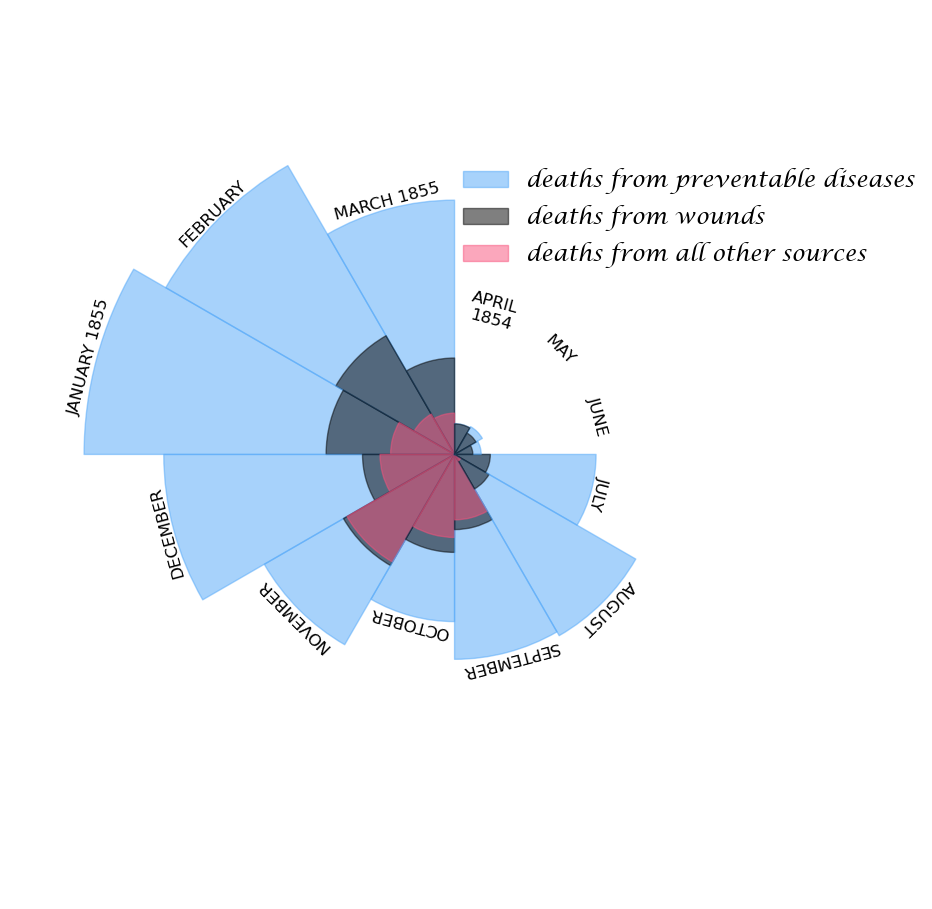

In [94]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_aspect(1.)

patches = []
color = []
total = 90 # First wedge starts off at 90'
angle = 30 # Each wedge covers 30'

for i in range(infectious.shape[0])[::1]:
    for j, col in enumerate(['Infectious Disease', 
                             'All Other Causes', 
                             'Wounds and Injuries', ]):
        value = infectious[col].iloc[i]
        patches.append(Wedge((0, 0), np.sqrt(value), 
                                     total,
                                     total+angle
                                     ))
        color.append(colors[j])
    
    length = np.max([np.sqrt(infectious.iloc[i, 1:4].max())+0.02, 0.4])
    x = length * np.cos((total+angle/2)*np.pi/180)
    y = length * np.sin((total+angle/2)*np.pi/180)
    
    label = infectious['date'].iloc[i]
        
    if label[:3] not in ['Mar', 'Jan', 'Apr']:
        label = label.split()[0]
    elif label[:3] == 'Apr':
        label = '\n'.join(label.split())
    
    ax.text(x, y, label.upper(), rotation=(total+angle/2-90), 
            ha='center', va='center', fontsize=12)
    
    total += angle

p = PatchCollection(patches, color=color, alpha=0.5)
ax.add_collection(p)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

patches = []
legend = ['deaths from preventable diseases', 
          'deaths from wounds', 
          'deaths from all other sources']

# you'll need to change the font location
font = font_manager.FontProperties(fname='data/Lucida Calligraphy Italic.ttf',
                               weight='normal',
                               style='italic', size=16)

for i, leg in enumerate(legend):
    patches.append(Patch(color=colors[i], label=leg, alpha=0.5))

ax.legend(handles=patches, loc=(0.5, 0.7), 
          fancybox=False, frameon=False, prop=font)

ax.axis('off')
fig.tight_layout()

# Polar Plots

For this example, we will use a NASA dataset of global temperatures available [here](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv). 

We start by loading the data from a local csv file

In [95]:
data = pd.read_csv('data/GLB.Ts+dSST.csv', skiprows=1, dtype='str', na_values='***')

Data has a month per column and a year per row

In [96]:
data

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880  -.20  -.25  -.09  -.16  -.09  -.22  -.20  -.09  -.15  -.22  -.22   
1    1881  -.19  -.15   .02   .04   .07  -.19   .01  -.04  -.16  -.22  -.18   
2    1882   .16   .14   .05  -.15  -.13  -.22  -.16  -.07  -.14  -.23  -.17   
3    1883  -.29  -.36  -.12  -.18  -.18  -.07  -.07  -.14  -.22  -.11  -.24   
4    1884  -.12  -.08  -.36  -.40  -.33  -.35  -.30  -.28  -.27  -.25  -.33   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
140  2020  1.17  1.24  1.17  1.12  1.01   .91   .89   .86   .98   .87  1.10   
141  2021   .81   .64   .89   .76   .79   .84   .92   .82   .92   .99   .93   
142  2022   .91   .89  1.05   .84   .84   .92   .94   .95   .89   .96   .73   
143  2023   .87   .96  1.22   .99   .94  1.08  1.19  1.19  1.48  1.34  1.42   
144  2024  1.24  1.43  1.40  1.32  1.16  1.25  1.21  1.30   NaN   NaN   NaN   

      Dec   J-D   D-N   DJF   MAM   JJA   SON  
0    -.18  -.17   NaN   NaN  -.11  -.17  -.20  
1    -.07  -.09  -.10  -.18   .04  -.07  -.19  
2    -.36  -.11  -.08   .08  -.08  -.15  -.18  
3    -.11  -.17  -.20  -.34  -.16  -.09  -.19  
4    -.30  -.28  -.27  -.10  -.36  -.31  -.28  
..    ...   ...   ...   ...   ...   ...   ...  
140   .79  1.01  1.04  1.17  1.10   .89   .98  
141   .87   .85   .84   .75   .81   .86   .95  
142   .80   .89   .90   .89   .91   .94   .86  
143  1.35  1.17  1.12   .88  1.05  1.15  1.41  
144   NaN   NaN   NaN  1.34  1.30  1.25   NaN  

[145 rows x 19 columns]

Melt the data so that each month/year value has its own row

In [97]:
data_long = pd.melt(data[data.columns[:13]], id_vars=['Year'], 
                    value_name='Temp', var_name='Month')
data_long.index = data_long[
    ['Year', "Month"]
].apply(lambda x: pd.to_datetime("%s-%s" % (x.Year, x.Month)), axis=1)

data_long.Temp = data_long.Temp.astype('float')

data_long.sort_index(inplace=True)

Compute the angle for each point. Each month gets a slice of $2\pi/12$ degrees

In [98]:
data_long['angle'] = (data_long.index.month-1)/12*2*np.pi

In [99]:
data_long.head()

Year Month  Temp     angle
1880-01-01  1880   Jan -0.20  0.000000
1880-02-01  1880   Feb -0.25  0.523599
1880-03-01  1880   Mar -0.09  1.047198
1880-04-01  1880   Apr -0.16  1.570796
1880-05-01  1880   May -0.09  2.094395

Create an array associating each temperature value with the corresponding angle

In [100]:
points = np.array([data_long.angle, data_long.Temp]).T.reshape(-1, 1, 2)

Reshuffle the data to generate individual line segments that we can color separately.

In [101]:
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [102]:
segments.shape

(1739, 2, 2)

Month names

In [103]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']

The original figure doesn't include a colorbar, but it is always good to include one to make clear what each color corresponds to

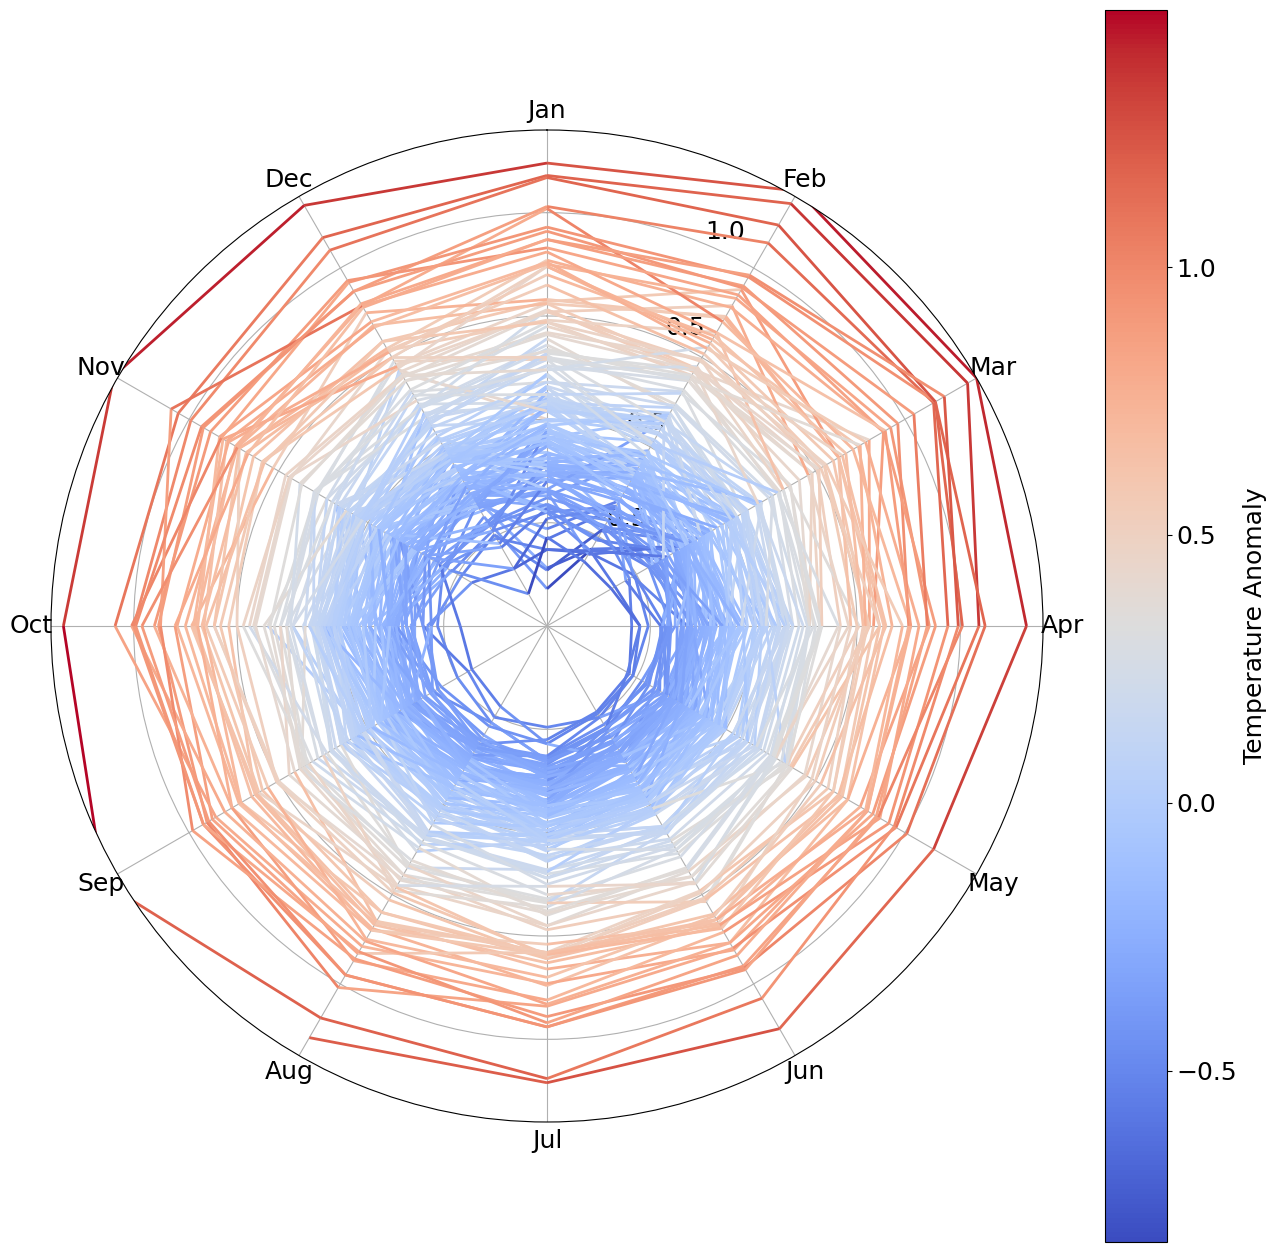

In [104]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(16, 16))

# Make the plot clockwise
ax.set_theta_direction(-1)

# With the zero (Jan) on top
ax.set_theta_zero_location('N')

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(data_long.Temp.min(), data_long.Temp.max())
lc = LineCollection(segments, cmap=plt.cm.coolwarm, norm=norm)

# Set the values used for colormapping
lc.set_array(data_long.Temp)
lc.set_linewidth(2)
line = ax.add_collection(lc)

ax.set_ylim(-1, 1.4)
ax.set_xticks(np.arange(12)/12*2*np.pi)
ax.set_xticklabels(labels, fontsize=18)

# Generate the color bar
cb = fig.colorbar(line, ax=ax)
cb.set_label('Temperature Anomaly', size=18)
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), size=18)
plt.setp(plt.getp(ax.axes, 'yticklabels'), size=18, zorder=3);

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>